# EDA

In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


In [37]:
train_1 = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
movie = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
print("Original length of train: ",len(train_1))
train_1 = train_1.drop_duplicates()
print("length of train after dropping duplicates: ",len(train_1))

print("Original length of movie: ",len(movie))
movie = movie.drop_duplicates()
print("length of train after dropping duplicates: ",len(movie))

Original length of train:  162758
length of train after dropping duplicates:  161640
Original length of movie:  143258
length of train after dropping duplicates:  141687


In [38]:
train_1.isna().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6397
sentiment                0
dtype: int64

In [39]:
# dropping null values since we are analysing sentiment of reviews
train_1 = train_1.dropna()
#train_1['reviewText'].fillna('',inplace = True)

In [40]:
movie.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [41]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141687 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               141687 non-null  object 
 1   title                 141687 non-null  object 
 2   audienceScore         72628 non-null   float64
 3   rating                13856 non-null   object 
 4   ratingContents        13856 non-null   object 
 5   releaseDateTheaters   30512 non-null   object 
 6   releaseDateStreaming  78730 non-null   object 
 7   runtimeMinutes        128314 non-null  float64
 8   genre                 131030 non-null  object 
 9   originalLanguage      128282 non-null  object 
 10  director              141687 non-null  object 
 11  boxOffice             14616 non-null   object 
 12  distributor           22803 non-null   object 
 13  soundType             15785 non-null   object 
dtypes: float64(2), object(12)
memory usage: 16.2+ MB


In [42]:
100*movie.isna().sum()/len(movie)

movieid                  0.000000
title                    0.000000
audienceScore           48.740534
rating                  90.220698
ratingContents          90.220698
releaseDateTheaters     78.465209
releaseDateStreaming    44.433858
runtimeMinutes           9.438410
genre                    7.521509
originalLanguage         9.460995
director                 0.000000
boxOffice               89.684304
distributor             83.906075
soundType               88.859246
dtype: float64

In [43]:
len(train_1['movieid'].unique())

16412

In [44]:
def extract_year_month(date_str):
    if pd.isnull(date_str):  # Check if the value is NaN
        return np.nan, np.nan  # Return NaN for year and month
    year, month, _ = date_str.split('-')
    return str(year), str(month)

movie[['Theatreyear', 'Theatremonth']] = movie['releaseDateTheaters'].apply(extract_year_month).to_list()
movie[['Streamingyear', 'Streamingmonth']] = movie['releaseDateStreaming'].apply(extract_year_month).to_list()

In [45]:
movie.columns

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType', 'Theatreyear', 'Theatremonth', 'Streamingyear',
       'Streamingmonth'],
      dtype='object')

In [46]:
#movie.drop(columns = ['releaseDateTheaters', 'releaseDateStreaming'],inplace = True)

In [47]:
movie[movie['movieid']=='escape_the_terminator_tyler_durden_astonish'][['audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType', 'Theatreyear', 'Theatremonth', 'Streamingyear',
       'Streamingmonth']]

,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType,Theatreyear,Theatremonth,Streamingyear,Streamingmonth
871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4038,NaN,NaN,NaN,2022-04-29,NaN,140.0,Drama,French (France),Stephanie Russell,NaN,Utopia,NaN,2022,04,NaN,NaN
17111,NaN,NaN,NaN,NaN,2018-10-11,95.0,Mystery & thriller,English,Robert Isaac,NaN,NaN,Stereo,NaN,NaN,2018,10
17480,NaN,NaN,NaN,NaN,2013-01-01,90.0,Musical,English,Gary Ricker,NaN,NaN,NaN,NaN,NaN,2013,01
18101,NaN,NaN,NaN,NaN,2018-04-07,120.0,Documentary,English,Jonathan Bearden,NaN,NaN,NaN,NaN,NaN,2018,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135700,NaN,NaN,NaN,NaN,2010-11-16,92.0,"Drama, Romance, Biography",English,Michael Carvalho,NaN,NaN,NaN,NaN,NaN,2010,11
136062,NaN,NaN,NaN,2012-09-28,2018-10-01,160.0,"Action, Mystery & thriller",Tamil,Rosa Beauregard,$206.0K,UTV Motion Pictures,NaN,2012,09,2018,10
136066,NaN,NaN,NaN,NaN,NaN,NaN,"Fantasy, Animation",English,Malcolm Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136493,NaN,NaN,NaN,NaN,NaN,89.0,Drama,German,Elizabeth Wilder,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
movie[movie['movieid']=='escape_the_terminator_tyler_durden_astonish'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 871 to 137235
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieid               73 non-null     object 
 1   title                 73 non-null     object 
 2   audienceScore         0 non-null      float64
 3   rating                5 non-null      object 
 4   ratingContents        5 non-null      object 
 5   releaseDateTheaters   11 non-null     object 
 6   releaseDateStreaming  40 non-null     object 
 7   runtimeMinutes        62 non-null     float64
 8   genre                 67 non-null     object 
 9   originalLanguage      67 non-null     object 
 10  director              73 non-null     object 
 11  boxOffice             2 non-null      object 
 12  distributor           7 non-null      object 
 13  soundType             4 non-null      object 
 14  Theatreyear           11 non-null     object 
 15  Theatremonth       

In [49]:
100*movie.isna().sum()/len(movie)

movieid                  0.000000
title                    0.000000
audienceScore           48.740534
rating                  90.220698
ratingContents          90.220698
releaseDateTheaters     78.465209
releaseDateStreaming    44.433858
runtimeMinutes           9.438410
genre                    7.521509
originalLanguage         9.460995
director                 0.000000
boxOffice               89.684304
distributor             83.906075
soundType               88.859246
Theatreyear             78.465209
Theatremonth            78.465209
Streamingyear           44.433858
Streamingmonth          44.433858
dtype: float64

## Removing duplicates in Movie dataset

In [50]:
movie = movie.drop_duplicates()
m = movie[['movieid','title']].groupby(by='movieid').count()
m.reset_index().sort_values('title',ascending=False)

,movieid,title
30505,escape_the_terminator_tyler_durden_astonish,73
10850,crimson_james_t._kirk_marty_mcfly_hulk,17
94267,rocky_balboa_wonder_woman_majestic_emerald,16
12456,darth_vader_dazzling_courageous_holly_golightly,16
98757,silent_mystery_the_terminator,16
...,...,...
43696,hannibal_lecter_glimmer,1
43695,hannibal_lecter_gandalf_zephyr_legend,1
43694,hannibal_lecter_gandalf_whispering_stardust,1
43693,hannibal_lecter_gandalf_velvet_t-800,1


In [51]:
movie.dtypes

movieid                  object
title                    object
audienceScore           float64
rating                   object
ratingContents           object
releaseDateTheaters      object
releaseDateStreaming     object
runtimeMinutes          float64
genre                    object
originalLanguage         object
director                 object
boxOffice                object
distributor              object
soundType                object
Theatreyear              object
Theatremonth             object
Streamingyear            object
Streamingmonth           object
dtype: object

In [52]:
len(m[m.title>1])

9270

In [53]:
movie.isna().sum()

movieid                      0
title                        0
audienceScore            69059
rating                  127831
ratingContents          127831
releaseDateTheaters     111175
releaseDateStreaming     62957
runtimeMinutes           13373
genre                    10657
originalLanguage         13405
director                     0
boxOffice               127071
distributor             118884
soundType               125902
Theatreyear             111175
Theatremonth            111175
Streamingyear            62957
Streamingmonth           62957
dtype: int64

In [54]:
def convert(x):
    if str(x) == 'nan':
        return x
    elif x[-1] == 'B':
        return float(x[1:-1])*1000000000
    elif x[-1] == 'M':
        return float(x[1:-1])*1000000
    elif x[-1] == 'K':
        return float(x[1:-1])*1000
    else:
        return float(x[1:])
    
movie['boxOffice'] = movie['boxOffice'].apply(lambda x:convert(x))

In [55]:
#Clubbing Ratings which mean the same thing
rating_dict = {'TV14':'PG-13',
     'TVPG':'PG',
     'TVMA':'R',
     'NC-17':'R'}
movie['rating'] = movie['rating'].apply(lambda x:rating_dict[x] if x in rating_dict else x)


In [56]:
movie.dtypes

movieid                  object
title                    object
audienceScore           float64
rating                   object
ratingContents           object
releaseDateTheaters      object
releaseDateStreaming     object
runtimeMinutes          float64
genre                    object
originalLanguage         object
director                 object
boxOffice               float64
distributor              object
soundType                object
Theatreyear              object
Theatremonth             object
Streamingyear            object
Streamingmonth           object
dtype: object

In [57]:
movie['RN'] = movie.sort_values(['releaseDateTheaters','audienceScore','boxOffice'], ascending=[False,False,False]).groupby(['movieid']).cumcount() + 1

In [58]:
# #Removing duplicates by aggregating movie records

# def f_mi(x):
#     d = []
#     for i,j in zip(x.columns,x.dtypes):
#         if j == 'object':
#             try:
#                 d.append(x[i].mode()[0])
#             except:
#                 d.append(np.nan)
#         else:
#             d.append(x[i].mean())
#     return pd.Series(d, index=[x.columns])

In [59]:
# movies_data_clean = movie.groupby('movieid').apply(f_mi)

In [60]:
# movies_data_clean = movies_data_clean.reset_index(drop=True)
# movies_data_clean.columns

In [61]:
movies_data_clean = movie[movie['RN']==1].reset_index(drop=True)

In [62]:
# movies_data_clean.columns = [i[0] for i in movies_data_clean.columns]

In [63]:
m = movies_data_clean[['movieid','title']].groupby(by='movieid').count()

In [64]:
m.sort_values(by = 'title',ascending = False)

,title
movieid,
adventure_anakin_skywalker,1
neo_forrest_gump_willy_wonka_marty_mcfly,1
neo_forrest_gump_magic_jack_sparrow,1
neo_forrest_gump_labyrinth_james_bond,1
neo_forrest_gump_journey,1
...,...
han_solo_chronicles_scarlett_o'hara,1
han_solo_chronicles_iron_man_gandalf_the_grey,1
han_solo_chronicles_gandalf_dorothy_gale,1


In [65]:
movies_data_clean.isna().sum()/len(movies_data_clean)

movieid                 0.000000
title                   0.000000
audienceScore           0.479811
rating                  0.899805
ratingContents          0.899805
releaseDateTheaters     0.771400
releaseDateStreaming    0.442470
runtimeMinutes          0.097125
genre                   0.077925
originalLanguage        0.096453
director                0.000000
boxOffice               0.891586
distributor             0.828914
soundType               0.888200
Theatreyear             0.771400
Theatremonth            0.771400
Streamingyear           0.442470
Streamingmonth          0.442470
RN                      0.000000
dtype: float64

In [66]:
movies_data_clean.drop('RN',axis = 1,inplace = True)

In [67]:
movies_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126404 entries, 0 to 126403
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               126404 non-null  object 
 1   title                 126404 non-null  object 
 2   audienceScore         65754 non-null   float64
 3   rating                12665 non-null   object 
 4   ratingContents        12665 non-null   object 
 5   releaseDateTheaters   28896 non-null   object 
 6   releaseDateStreaming  70474 non-null   object 
 7   runtimeMinutes        114127 non-null  float64
 8   genre                 116554 non-null  object 
 9   originalLanguage      114212 non-null  object 
 10  director              126404 non-null  object 
 11  boxOffice             13704 non-null   float64
 12  distributor           21626 non-null   object 
 13  soundType             14132 non-null   object 
 14  Theatreyear           28896 non-null   object 
 15  

In [68]:
del movie

In [69]:
movies_data_clean.columns

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType', 'Theatreyear', 'Theatremonth', 'Streamingyear',
       'Streamingmonth'],
      dtype='object')

## Creating Train by merging with Movie data 

In [70]:
train=train_1.merge(movies_data_clean,on ='movieid',how='left',sort = False)

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155243 entries, 0 to 155242
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               155243 non-null  object 
 1   reviewerName          155243 non-null  object 
 2   isFrequentReviewer    155243 non-null  bool   
 3   reviewText            155243 non-null  object 
 4   sentiment             155243 non-null  object 
 5   title                 155243 non-null  object 
 6   audienceScore         151156 non-null  float64
 7   rating                110944 non-null  object 
 8   ratingContents        110944 non-null  object 
 9   releaseDateTheaters   139973 non-null  object 
 10  releaseDateStreaming  147619 non-null  object 
 11  runtimeMinutes        154238 non-null  float64
 12  genre                 154662 non-null  object 
 13  originalLanguage      154346 non-null  object 
 14  director              155243 non-null  object 
 15  

In [72]:
del train_1

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155243 entries, 0 to 155242
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               155243 non-null  object 
 1   reviewerName          155243 non-null  object 
 2   isFrequentReviewer    155243 non-null  bool   
 3   reviewText            155243 non-null  object 
 4   sentiment             155243 non-null  object 
 5   title                 155243 non-null  object 
 6   audienceScore         151156 non-null  float64
 7   rating                110944 non-null  object 
 8   ratingContents        110944 non-null  object 
 9   releaseDateTheaters   139973 non-null  object 
 10  releaseDateStreaming  147619 non-null  object 
 11  runtimeMinutes        154238 non-null  float64
 12  genre                 154662 non-null  object 
 13  originalLanguage      154346 non-null  object 
 14  director              155243 non-null  object 
 15  

# EDA

In [74]:
df = train.copy()

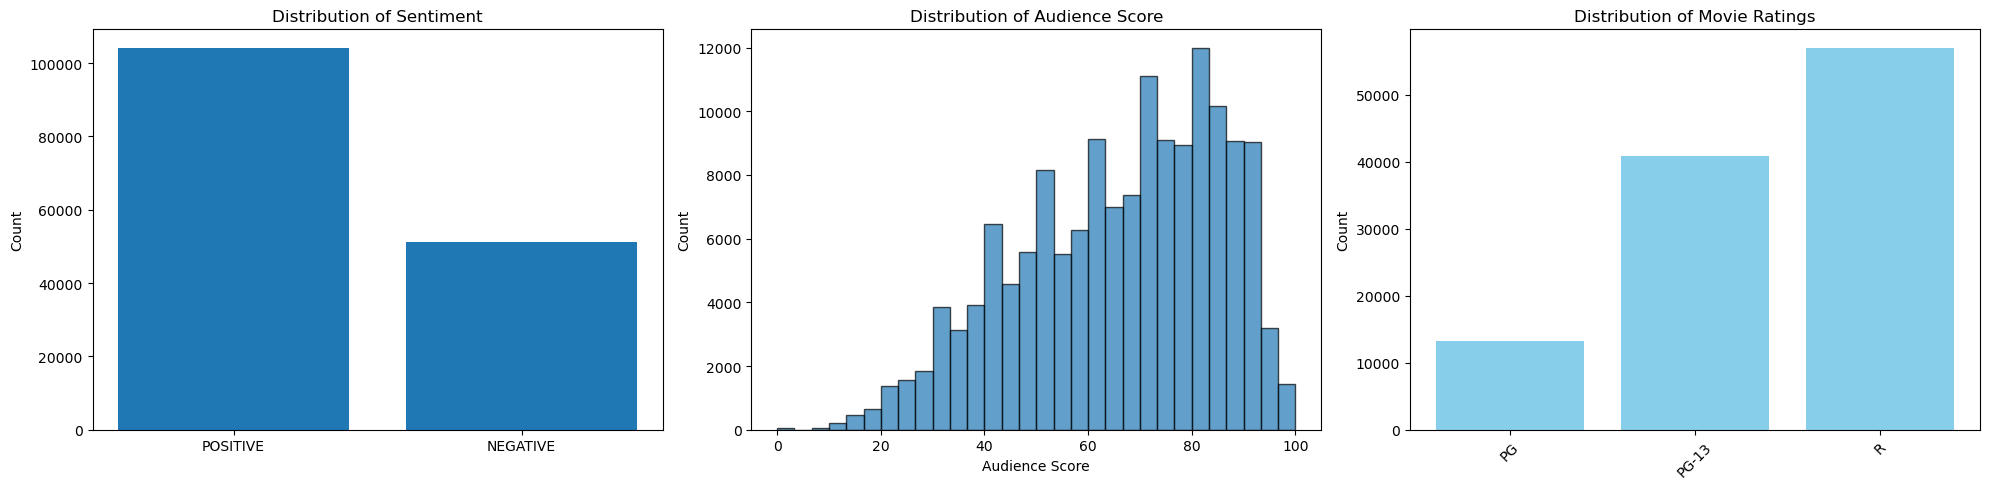

In [75]:
# Using matplotlib for plotting

# Initialize the figure
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Distribution of Sentiment using matplotlib
axes[0].bar(train['sentiment'].value_counts().index, train['sentiment'].value_counts().values)
axes[0].set_title('Distribution of Sentiment')
axes[0].set_ylabel('Count')

# Distribution of Audience Score using matplotlib
axes[1].hist(train['audienceScore'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Audience Score')
axes[1].set_xlabel('Audience Score')
axes[1].set_ylabel('Count')

# Distribution of Movie Ratings using matplotlib
ratings_counts = train['rating'].value_counts()
ratings_order = sorted(ratings_counts.index)
axes[2].bar(ratings_order, ratings_counts[ratings_order].values, color='skyblue')
axes[2].set_title('Distribution of Movie Ratings')
axes[2].set_xticks(list(ratings_order))
axes[2].set_xticklabels(ratings_order, rotation=45)
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


> The dataset seems to have an imbalanced distribution between positive and negative sentiments.

> The audience score is somewhat normally distributed (little left skewed), with a peak around the 60-80 range. This means most movies have average scores, with fewer movies being rated exceptionally high or low.

> The most common movie ratings are 'R' and 'PG-13'. The dataset also contains a few other ratings, but they are less frequent.

> The audience score's distribution gives us an idea of the general trend in movie ratings. Most movies tend to have average scores.

> The dominance of 'R' and 'PG-13' ratings indicates that these types of movies are more common in the dataset.

In [76]:
#Imbalanced dataset
train['sentiment'].value_counts()

POSITIVE    104006
NEGATIVE     51237
Name: sentiment, dtype: int64

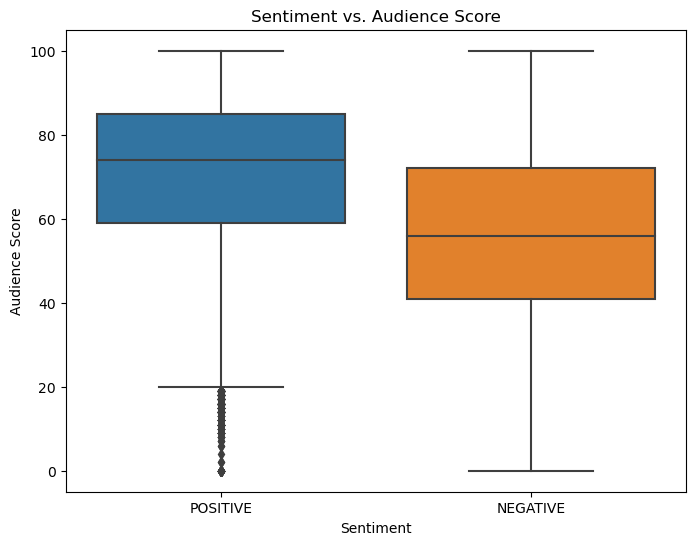

In [77]:
# Plot a box plot to visualize the distribution of 'audienceScore' for each sentiment category
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='audienceScore', data=train)
plt.title('Sentiment vs. Audience Score')
plt.xlabel('Sentiment')
plt.ylabel('Audience Score')
plt.show()

> Positive reviews tend to be associated with movies that have higher audience scores.
There is a noticeable difference in the median audience score for positive and negative reviews. This suggests that audience score may be a useful feature for predicting sentiment.

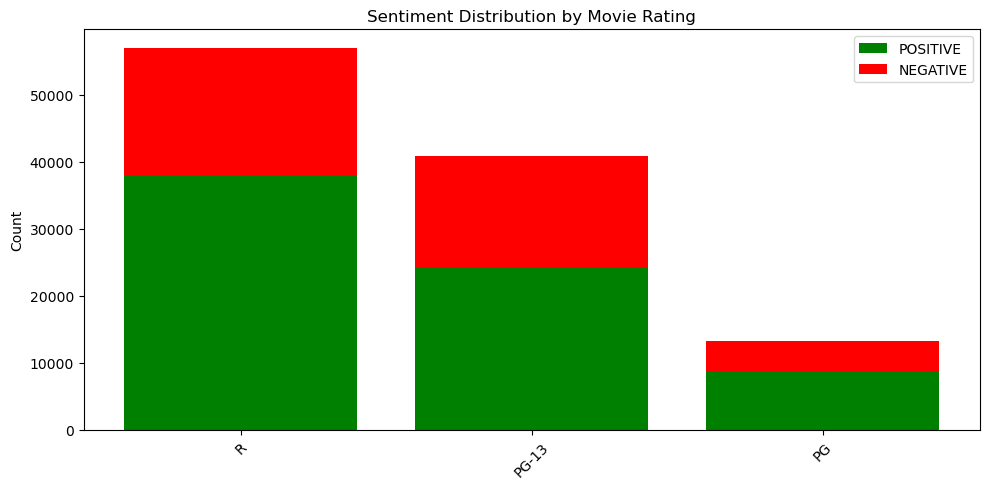

In [78]:
# Initialize the figure for only the bar chart
fig, ax = plt.subplots(figsize=(10, 5))

# Stacked bar chart for Sentiment Distribution by Movie Rating
ratings_ordered = train['rating'].value_counts().index
pos_counts = train[train['sentiment'] == 'POSITIVE']['rating'].value_counts()
neg_counts = train[train['sentiment'] == 'NEGATIVE']['rating'].value_counts()

ax.bar(ratings_ordered, pos_counts[ratings_ordered].values, label='POSITIVE', color='green')
ax.bar(ratings_ordered, neg_counts[ratings_ordered].values, label='NEGATIVE', color='red', bottom=pos_counts[ratings_ordered].values)
ax.set_title('Sentiment Distribution by Movie Rating')
ax.set_ylabel('Count')
ax.set_xticks(ratings_ordered)
ax.set_xticklabels(ratings_ordered, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


> The distribution of positive and negative reviews is almost the same across all the ratings

In [79]:
train.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType', 'Theatreyear', 'Theatremonth', 'Streamingyear',
       'Streamingmonth'],
      dtype='object')

In [80]:
#Missing Values in the data
missing_data = train.isna().sum()
100*missing_data[missing_data > 0]/len(train)

audienceScore            2.632647
rating                  28.535264
ratingContents          28.535264
releaseDateTheaters      9.836192
releaseDateStreaming     4.911010
runtimeMinutes           0.647372
genre                    0.374252
originalLanguage         0.577804
boxOffice               22.401654
distributor             12.657576
soundType               48.133571
Theatreyear              9.836192
Theatremonth             9.836192
Streamingyear            4.911010
Streamingmonth           4.911010
dtype: float64

In [81]:
missing_data[missing_data > 0]

audienceScore            4087
rating                  44299
ratingContents          44299
releaseDateTheaters     15270
releaseDateStreaming     7624
runtimeMinutes           1005
genre                     581
originalLanguage          897
boxOffice               34777
distributor             19650
soundType               74724
Theatreyear             15270
Theatremonth            15270
Streamingyear            7624
Streamingmonth           7624
dtype: int64

# Feature Engineering and Imputation

In [82]:
# Working with rating contents column

def filter_sexualcontents_function(contents):
    excluded_keywords = {'sexual', 'nudity', 'suggestive', 'sensual', 'mature', 'nude'}
    try:
        return int(any(keyword in contents.lower() for keyword in excluded_keywords) or contents.lower() == 's')
    except:
        return np.nan

def filter_violence_function(contents):
    excluded_keywords = {'violence','gun','suicide','peril','graphic','bloody','gross','threat','rape','danger','racism','fright','mayhem','abuse','brutal','accident','racial','rude','sadistic','some','gore','crime', 'disturb', 'intense', 'violent', 'war', 'action', 'gruesome', 'grisly', 'scary', 'strong', 'terror','images','fight'}
    try:
        return int(any(keyword in contents.lower() for keyword in excluded_keywords) or contents.lower() == 'V')
    except:
        return np.nan  
    
def drug_function(contents):
    excluded_keywords = {'drug', 'alcohol', 'smoking','drink','substance'}
    try:
        return int(any(keyword in contents.lower() for keyword in excluded_keywords) or contents.lower() == 'D')
    except:
        return np.nan     
    
def language_function(contents):
    excluded_keywords = {'language'}
    try:
        return int(any(keyword in contents.lower() for keyword in excluded_keywords) or contents.lower() == 'L')
    except:
        return np.nan 


def teen_and_children(contents):
    excluded_keywords = {'teen', 'minor', 'bully','child','puppet','reckless'}
    try:
        return int(any(keyword in contents.lower() for keyword in excluded_keywords))
    except:
        return np.nan 


In [83]:
def feature_engineering(df1):
    df = df1.copy()
    
    #Splitting Rating column 
    df['rating_R'] = df['rating'].apply(lambda x:int(str(x)=='R'))
    df['rating_PG13'] = df['rating'].apply(lambda x:int(str(x)=='PG-13'))
    df['rating_PG'] = df['rating'].apply(lambda x:int(str(x)=='PG'))
    df['rating_Unknown'] = df['rating'].apply(lambda x:int(str(x)=='nan'))
    
    df['releaseDateTheaters'] = pd.to_datetime(df['releaseDateTheaters'])
    df['releaseDateStreaming'] = pd.to_datetime(df['releaseDateStreaming'])
    
    df['releaseDateTheaters'] = pd.to_datetime(df['releaseDateTheaters'])
    df['releaseDateStreaming'] = pd.to_datetime(df['releaseDateStreaming'])
    
    df['ratingContents_SexualContents'] = df['ratingContents'].apply(filter_sexualcontents_function)
    df['ratingContents_ViolentDisturbing'] = df['ratingContents'].apply(filter_violence_function)
    df['ratingContents_Thematic'] = df['ratingContents'].apply(lambda x: int('Thematic' in str(x)))
    df['ratingContents_DrugsAlcohol'] = df['ratingContents'].apply(drug_function)
    df['ratingContents_Language'] = df['ratingContents'].apply(language_function)
    df['ratingContents_TeenandChildren'] = df['ratingContents'].apply(teen_and_children)
  
    #Creating new columns
    df['streaming_diff'] = df.apply(lambda x:(x['releaseDateStreaming']-x['releaseDateTheaters']).days,axis=1)
    df['review_len'] = df['reviewText'].apply(lambda x:len(str(x)))
    df['review_words'] = df['reviewText'].apply(lambda x:len(str(x).split()))
    
    #Splitting genre into multiple columns 
    df['genre_drama'] = df['genre'].apply(lambda x:int('drama' in str(x).lower()))
    df['genre_comedy'] = df['genre'].apply(lambda x:int('comedy' in str(x).lower()))
    df['genre_thriller'] = df['genre'].apply(lambda x:int('thriller' in str(x).lower() or 'mystery' in str(x).lower()))
    df['genre_action'] = df['genre'].apply(lambda x:int('action' in str(x).lower()))
    df['genre_adventure'] = df['genre'].apply(lambda x:int('adventure' in str(x).lower()))
    df['genre_fantasy'] = df['genre'].apply(lambda x:int('fantasy' in str(x).lower()))
    df['genre_documentary'] = df['genre'].apply(lambda x:int('documentary' in str(x).lower()))
    df['genre_romance'] = df['genre'].apply(lambda x:int('romance' in str(x).lower()))
    df['genre_horror'] = df['genre'].apply(lambda x:int('horror' in str(x).lower()))
    df['genre_sci_fi'] = df['genre'].apply(lambda x:int('sci-fi' in str(x).lower()))
    df['genre_crime'] = df['genre'].apply(lambda x:int('crime' in str(x).lower()))
    df['genre_family'] = df['genre'].apply(lambda x:int('kids' in str(x).lower() or 'family' in str(x).lower()))
    df['genre_biography'] = df['genre'].apply(lambda x:int('biography' in str(x).lower()))
    
    df['language_english'] = df['originalLanguage'].apply(lambda x:int(x=='English'))
    
    #df['Theatreyear'] = df['Theatreyear'].fillna(0)
    df['Theatreyear'] = df['Theatreyear'].apply(lambda x:int(x) if str(x)!='nan' else x)
    #df['Theatremonth'] = df['Theatremonth'].fillna(0)
    df['Theatremonth'] = df['Theatremonth'].apply(lambda x:int(x) if str(x)!='nan' else x)
    #df['Streamingyear'] = df['Streamingyear'].fillna(0)
    df['Streamingyear'] = df['Streamingyear'].apply(lambda x:int(x) if str(x)!='nan' else x)
    #df['Streamingmonth'] = df['Streamingmonth'].fillna(0)
    df['Streamingmonth'] = df['Streamingmonth'].apply(lambda x:int(x) if str(x)!='nan' else x)
    
    df.drop(['soundType','ratingContents','originalLanguage','genre'],axis = 1,inplace = True)
    try:
        y_map = {'POSITIVE':1,'NEGATIVE':0}
        df['sentiment'] = df['sentiment'].apply(lambda x:y_map[x])
    except : 
        pass
    return df


train2 = feature_engineering(train)

In [84]:
train2.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'releaseDateTheaters',
       'releaseDateStreaming', 'runtimeMinutes', 'director', 'boxOffice',
       'distributor', 'Theatreyear', 'Theatremonth', 'Streamingyear',
       'Streamingmonth', 'rating_R', 'rating_PG13', 'rating_PG',
       'rating_Unknown', 'ratingContents_SexualContents',
       'ratingContents_ViolentDisturbing', 'ratingContents_Thematic',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren', 'streaming_diff', 'review_len',
       'review_words', 'genre_drama', 'genre_comedy', 'genre_thriller',
       'genre_action', 'genre_adventure', 'genre_fantasy', 'genre_documentary',
       'genre_romance', 'genre_horror', 'genre_sci_fi', 'genre_crime',
       'genre_family', 'genre_biography', 'language_english'],
      dtype='object')

In [85]:
#Missing Values in the new data
missing_data = train2.isna().sum()
100*missing_data[missing_data > 0]/len(train2)

audienceScore                        2.632647
rating                              28.535264
releaseDateTheaters                  9.836192
releaseDateStreaming                 4.911010
runtimeMinutes                       0.647372
boxOffice                           22.401654
distributor                         12.657576
Theatreyear                          9.836192
Theatremonth                         9.836192
Streamingyear                        4.911010
Streamingmonth                       4.911010
ratingContents_SexualContents       28.535264
ratingContents_ViolentDisturbing    28.535264
ratingContents_DrugsAlcohol         28.535264
ratingContents_Language             28.535264
ratingContents_TeenandChildren      28.535264
streaming_diff                      13.297862
dtype: float64

In [86]:
nan_dict = {}
nan_dict['audienceScore'] = train2['audienceScore'].mean()
nan_dict['rating'] = train2['rating'].mode()[0]
nan_dict['runtimeMinutes'] = train2['runtimeMinutes'].mode()[0]
nan_dict['distributor'] = train2['distributor'].mode()[0]
nan_dict['Theatreyear'] = train2['Theatreyear'].mode()[0]
nan_dict['Streamingyear'] = train2['Streamingyear'].mode()[0]
nan_dict['streaming_diff'] = train2['streaming_diff'].mode()[0]
nan_dict['Theatremonth'] = train2['Theatremonth'].mode()[0]
nan_dict['Streamingmonth'] = train2['Streamingmonth'].mode()[0]
nan_dict['boxOffice'] = train2['boxOffice'].mode()[0]

def nan_value_replacement(df):
    # NAN values 
    df['audienceScore'] = df['audienceScore'].fillna(nan_dict['audienceScore'])
    df['runtimeMinutes'] = df['runtimeMinutes'].fillna(nan_dict['runtimeMinutes'])
    df['Theatreyear'] = df['Theatreyear'].fillna(nan_dict['Theatreyear'])
    df['Streamingyear'] = df['Streamingyear'].fillna(nan_dict['Streamingyear'])
    df['streaming_diff'] = df['streaming_diff'].fillna(nan_dict['streaming_diff'])
    df['Theatremonth'] = df['Theatremonth'].fillna(nan_dict['Theatremonth'])
    df['Streamingmonth'] = df['Streamingmonth'].fillna(nan_dict['Streamingmonth'])
    df['boxOffice'].fillna(nan_dict['boxOffice'], inplace=True)
    df['rating'].fillna(nan_dict['boxOffice'], inplace=True)
    df['distributor'].fillna(nan_dict['boxOffice'], inplace=True)
    
    return df
train3 = nan_value_replacement(train2)

In [87]:
#Missing Values in the new data
missing_data = train3.isna().sum()
100*missing_data[missing_data > 0]/len(train2)

releaseDateTheaters                  9.836192
releaseDateStreaming                 4.911010
ratingContents_SexualContents       28.535264
ratingContents_ViolentDisturbing    28.535264
ratingContents_DrugsAlcohol         28.535264
ratingContents_Language             28.535264
ratingContents_TeenandChildren      28.535264
dtype: float64

In [88]:
train3 = train3.drop(columns = ['releaseDateTheaters','releaseDateStreaming'],axis =1)
train3.fillna(0,inplace = True)

In [89]:
train3.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'runtimeMinutes',
       'director', 'boxOffice', 'distributor', 'Theatreyear', 'Theatremonth',
       'Streamingyear', 'Streamingmonth', 'rating_R', 'rating_PG13',
       'rating_PG', 'rating_Unknown', 'ratingContents_SexualContents',
       'ratingContents_ViolentDisturbing', 'ratingContents_Thematic',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren', 'streaming_diff', 'review_len',
       'review_words', 'genre_drama', 'genre_comedy', 'genre_thriller',
       'genre_action', 'genre_adventure', 'genre_fantasy', 'genre_documentary',
       'genre_romance', 'genre_horror', 'genre_sci_fi', 'genre_crime',
       'genre_family', 'genre_biography', 'language_english'],
      dtype='object')

## Visualising Correlation between variables

/tmp/ipykernel_32/3352722966.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'rating_PG', 'rating_Unknown', 'language_english']].corr()


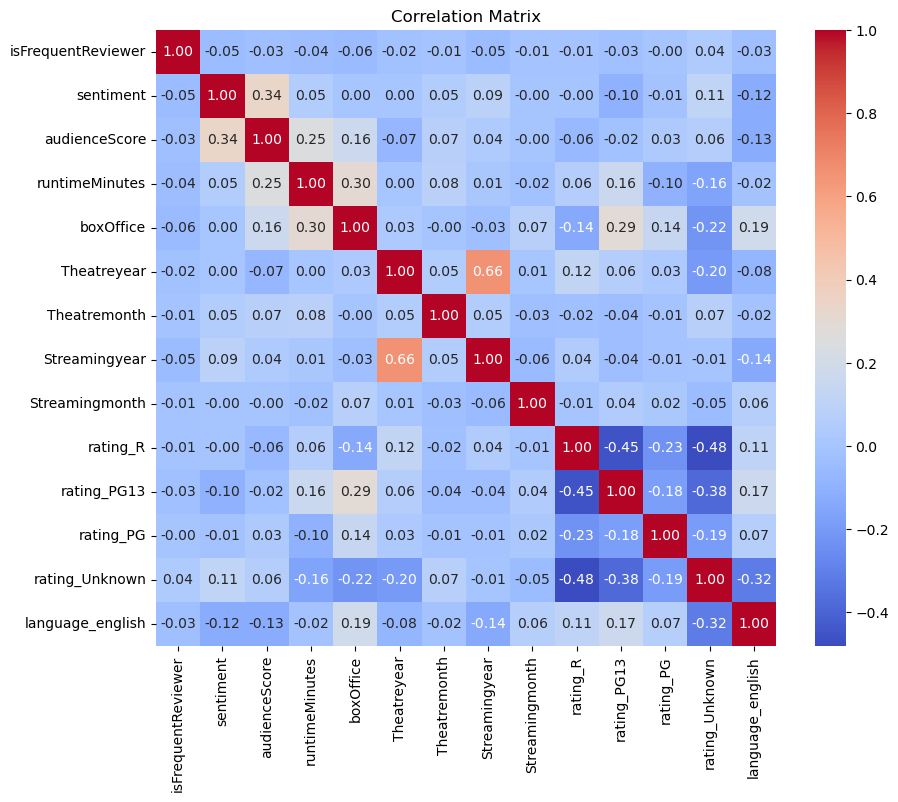

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
#correlation_matrix = train3[['sentiment','runtimeMinutes','Theatreyear', 'Theatremonth', 'Streamingyear', 'Streamingmonth','streaming_diff', 'review_len', 'review_words','language_english','audienceScore']].corr()
correlation_matrix = train3[['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'runtimeMinutes',
       'director', 'boxOffice', 'distributor', 'Theatreyear', 'Theatremonth',
       'Streamingyear', 'Streamingmonth', 'rating_R', 'rating_PG13',
       'rating_PG', 'rating_Unknown', 'language_english']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix")
plt.show()


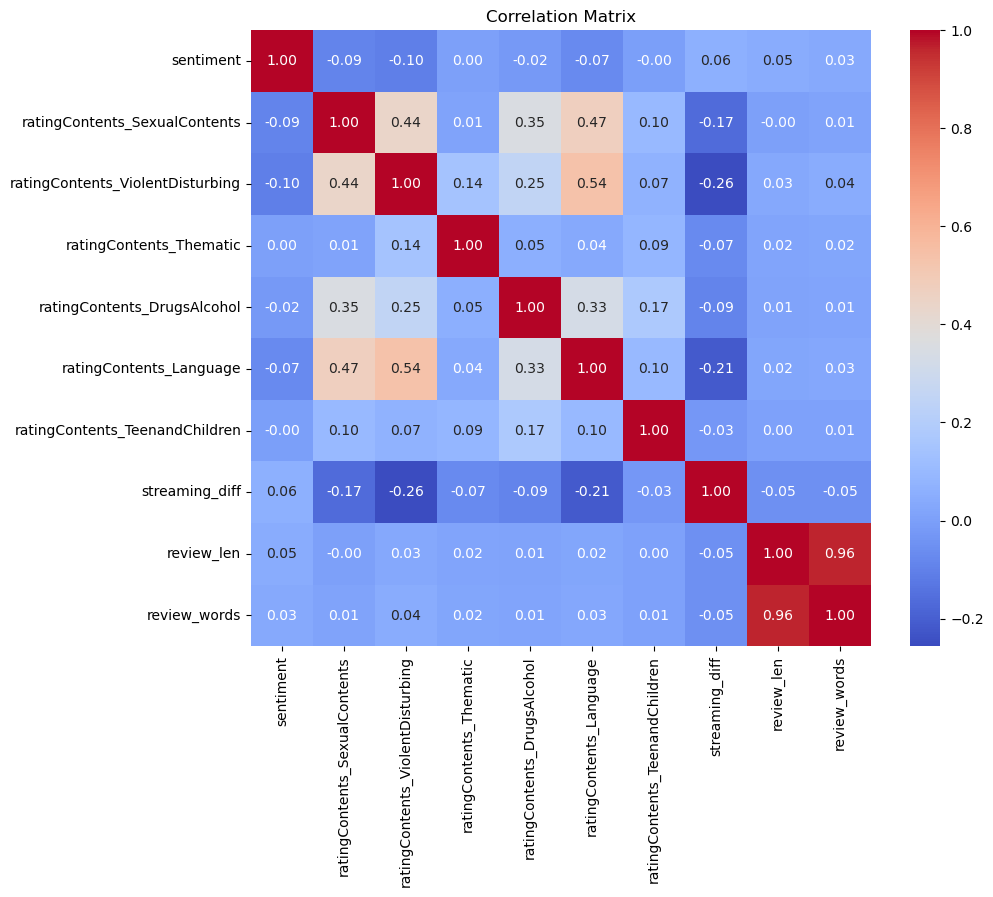

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
#correlation_matrix = train3[['sentiment','runtimeMinutes','Theatreyear', 'Theatremonth', 'Streamingyear', 'Streamingmonth','streaming_diff', 'review_len', 'review_words','language_english','audienceScore']].corr()
correlation_matrix = train3[['sentiment', 'ratingContents_SexualContents',
       'ratingContents_ViolentDisturbing', 'ratingContents_Thematic',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren', 'streaming_diff', 'review_len',
       'review_words']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix")
plt.show()


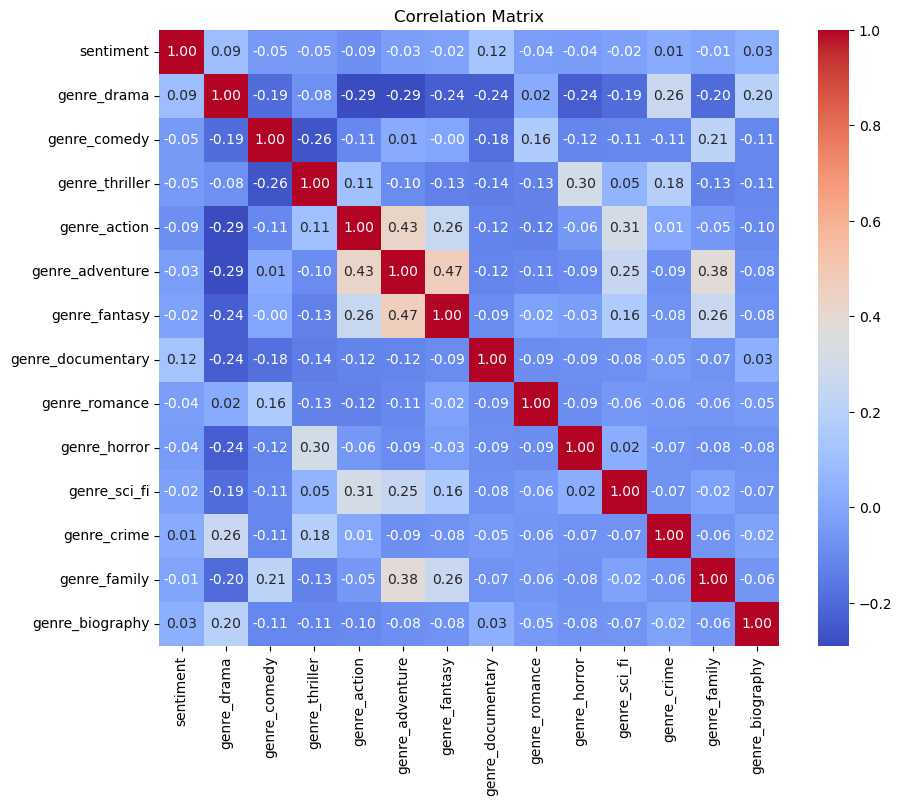

In [92]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
#correlation_matrix = train3[['sentiment','runtimeMinutes','Theatreyear', 'Theatremonth', 'Streamingyear', 'Streamingmonth','streaming_diff', 'review_len', 'review_words','language_english','audienceScore']].corr()
correlation_matrix = train3[['sentiment',  'genre_drama', 'genre_comedy', 'genre_thriller',
       'genre_action', 'genre_adventure', 'genre_fantasy', 'genre_documentary',
       'genre_romance', 'genre_horror', 'genre_sci_fi', 'genre_crime',
       'genre_family', 'genre_biography']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix")
plt.show()


<Axes: >

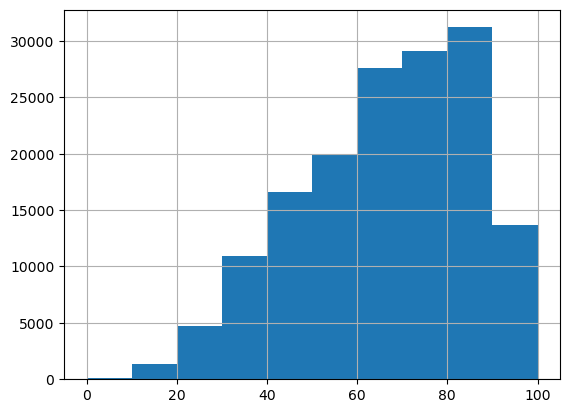

In [93]:
import matplotlib.pyplot as plt
train3.audienceScore.hist()

<Axes: >

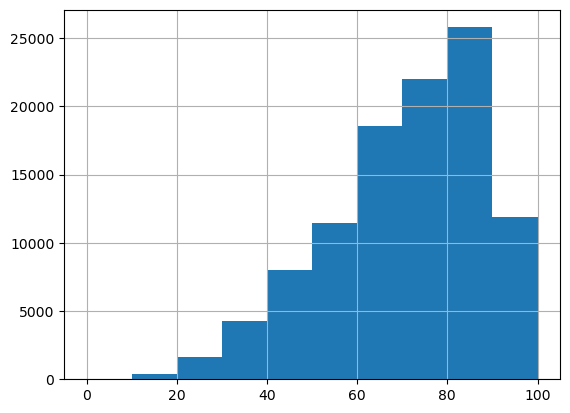

In [94]:
train3[train3.sentiment==1].audienceScore.hist()

<Axes: >

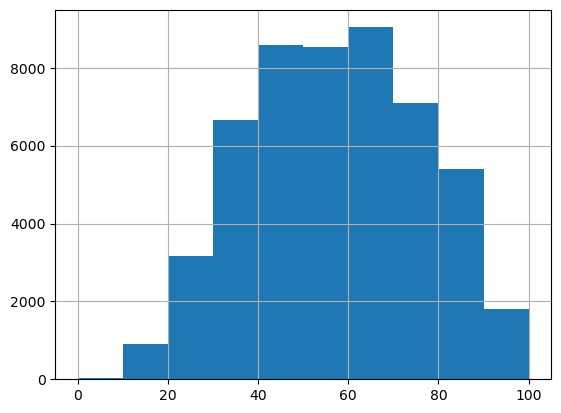

In [95]:
train3[train3.sentiment==0].audienceScore.hist()

In [96]:
train3['isFrequentReviewer'].value_counts(normalize = True,sort = True,ascending=False)

False    0.689178
True     0.310822
Name: isFrequentReviewer, dtype: float64

In [97]:
del train
del train2

In [98]:

# import re
# rating_category = {}
# for i in train.ratingContents:
#     for j in str(i).split(','):
#         j = re.sub(r'[^\w\s]', '',j.strip())
#         if j in rating_category:
#             rating_category[j]+=1
#         else:
#             rating_category[j] = 1

# {i:j for i,j in sorted(rating_category.items(),key = lambda x:x[1],reverse=True)}


In [99]:
# # creating a new feature using positive and negative frequencies
# sentiment_counts = train3.groupby('movieid')['sentiment'].value_counts().unstack().fillna(0)

# sentiment_count_difference = (sentiment_counts[1] - sentiment_counts[0]) / sentiment_counts.sum(axis=1)

# train3['sentiment_count_difference'] = train3['movieid'].map(sentiment_count_difference)

# train3.head()


In [100]:
train3.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'runtimeMinutes',
       'director', 'boxOffice', 'distributor', 'Theatreyear', 'Theatremonth',
       'Streamingyear', 'Streamingmonth', 'rating_R', 'rating_PG13',
       'rating_PG', 'rating_Unknown', 'ratingContents_SexualContents',
       'ratingContents_ViolentDisturbing', 'ratingContents_Thematic',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren', 'streaming_diff', 'review_len',
       'review_words', 'genre_drama', 'genre_comedy', 'genre_thriller',
       'genre_action', 'genre_adventure', 'genre_fantasy', 'genre_documentary',
       'genre_romance', 'genre_horror', 'genre_sci_fi', 'genre_crime',
       'genre_family', 'genre_biography', 'language_english'],
      dtype='object')

In [101]:
cols = ['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
     'title', 'audienceScore', 'rating', #'releaseDateTheaters',
       #'releaseDateStreaming',
        'runtimeMinutes', 'director', 'boxOffice',
       'distributor', 'Theatreyear', 'Theatremonth', 'Streamingyear',
       'Streamingmonth', 'ratingContents_SexualContents',
       'ratingContents_ViolentDisturbing', 'ratingContents_Thematic',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren', 'streaming_diff', 'rating_R',
       'rating_PG13', 'rating_PG', 'rating_Unknown', 'review_len',
       'review_words', 'genre_drama', 'genre_comedy', 'genre_thriller',
       'genre_action', 'genre_adventure', 'genre_fantasy', 'genre_documentary',
       'genre_romance', 'genre_horror', 'genre_sci_fi', 'genre_crime',
       'genre_family', 'genre_biography', 'language_english']

In [102]:
y_col = 'sentiment'

# Splitting data into train and test

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train3[cols], train3[y_col], test_size=0.2)

In [104]:
pd.set_option('display.max_columns', 500)
cat_cols = ['movieid','reviewerName','director','distributor']
len(X_train),len(X_test)

(124194, 31049)

In [105]:
X_train.dtypes

movieid                              object
reviewerName                         object
isFrequentReviewer                     bool
reviewText                           object
title                                object
audienceScore                       float64
rating                               object
runtimeMinutes                      float64
director                             object
boxOffice                           float64
distributor                          object
Theatreyear                         float64
Theatremonth                        float64
Streamingyear                       float64
Streamingmonth                      float64
ratingContents_SexualContents       float64
ratingContents_ViolentDisturbing    float64
ratingContents_Thematic               int64
ratingContents_DrugsAlcohol         float64
ratingContents_Language             float64
ratingContents_TeenandChildren      float64
streaming_diff                      float64
rating_R                        

In [106]:
train_df = X_train.copy()
train_df['y'] = y_train

In [107]:
for i in cat_cols:
    vars()[i+'_mean_val_map'] = train_df[[i,'y']].groupby(i).mean().to_dict()['y']
    vars()[i+'_count'] = train_df[[i,'y']].groupby(i).count().to_dict()['y']

In [108]:
reviewerName_mean_val_map = train_df[['reviewerName','y']].groupby('reviewerName').mean().to_dict()['y']
#rating_mean_val_map = train_df[['rating','y']].groupby('rating').mean().to_dict()['y']
director_mean_val_map = train_df[['director','y']].groupby('director').mean().to_dict()['y']
distributor_mean_val_map = train_df[['distributor','y']].groupby('distributor').mean().to_dict()['y']
movieid_mean_val_map = train_df[['movieid','y']].groupby('movieid').mean().to_dict()['y']


In [109]:
y_mean = y_train.mean()

In [110]:
for i in cat_cols:
    d = vars()[i+'_mean_val_map']
    X_train[i+'_mv'] = X_train[i].apply(lambda x:d[x] if x in d.keys() else y_mean)
    X_test[i+'_mv'] = X_test[i].apply(lambda x:d[x] if x in d.keys() else y_mean)
    d = vars()[i+'_count']
    X_train[i+'_c'] = X_train[i].apply(lambda x:d[x] if x in d.keys() else 0)
    X_test[i+'_c'] = X_test[i].apply(lambda x:d[x] if x in d.keys() else 0)
    X_train[i+'_mvc'] = X_train[i+'_mv']*X_train[i+'_c']
    X_test[i+'_mvc'] = X_test[i+'_mv']*X_test[i+'_c']

In [111]:
X_train[['ratingContents_ViolentDisturbing', 'ratingContents_SexualContents',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren']] = X_train[['ratingContents_ViolentDisturbing', 'ratingContents_SexualContents',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren']].replace(np.nan,0)
X_test[['ratingContents_ViolentDisturbing', 'ratingContents_SexualContents',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren']] = X_test[['ratingContents_ViolentDisturbing', 'ratingContents_SexualContents',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren']].replace(np.nan,0)

X_train.isFrequentReviewer = X_train.isFrequentReviewer.astype(int)
X_test.isFrequentReviewer = X_test.isFrequentReviewer.astype(int)

In [112]:
def corr_matrix(df,Target):
    np_corr = np.corrcoef(df,rowvar=0)
    features = df.columns.tolist()
    np_corr_df = pd.DataFrame(np_corr,columns=features,index=features)
    np_corr_df_sorted =np_corr_df.abs().sort_values(Target,ascending=False).sort_values(Target,axis=1,ascending=False)
    return np_corr_df_sorted

def corr_based_MRMR(corr_matrix,target_threshold,mutual_threshold):
    length = len(corr_matrix)
    featurelist_mrmr = [corr_matrix.index.values[1]]
    for i in range(2,length):
        for j in range(1,i):
            k=0
            if ((corr_matrix.iloc[i,j]<mutual_threshold and corr_matrix.iloc[0,j]>target_threshold) or corr_matrix.index.values[j] not in featurelist_mrmr):
                continue
            else:
                k=5
                break
        if k==0:
            featurelist_mrmr.append(corr_matrix.index.values[i])
    print("Count of selected features ",len(featurelist_mrmr))
    return featurelist_mrmr

In [113]:
X_train.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText', 'title',
       'audienceScore', 'rating', 'runtimeMinutes', 'director', 'boxOffice',
       'distributor', 'Theatreyear', 'Theatremonth', 'Streamingyear',
       'Streamingmonth', 'ratingContents_SexualContents',
       'ratingContents_ViolentDisturbing', 'ratingContents_Thematic',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren', 'streaming_diff', 'rating_R',
       'rating_PG13', 'rating_PG', 'rating_Unknown', 'review_len',
       'review_words', 'genre_drama', 'genre_comedy', 'genre_thriller',
       'genre_action', 'genre_adventure', 'genre_fantasy', 'genre_documentary',
       'genre_romance', 'genre_horror', 'genre_sci_fi', 'genre_crime',
       'genre_family', 'genre_biography', 'language_english', 'movieid_mv',
       'movieid_c', 'movieid_mvc', 'reviewerName_mv', 'reviewerName_c',
       'reviewerName_mvc', 'director_mv', 'director_c', 'director_mvc',


In [114]:
for i in X_train.columns: 
    if X_train[i].dtype=='object':
        print(i)

movieid
reviewerName
reviewText
title
rating
director
distributor


In [115]:
#Removing all object vars
cols2 = ['isFrequentReviewer', 'audienceScore', 'runtimeMinutes', 'boxOffice',
        'Theatreyear', 'Theatremonth', 'Streamingyear',
       'Streamingmonth', 'ratingContents_SexualContents',
       'ratingContents_ViolentDisturbing', 'ratingContents_Thematic',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren', 'streaming_diff', 'rating_R',
       'rating_PG13', 'rating_PG', 'rating_Unknown', 'review_len',
       'review_words', 'genre_drama', 'genre_comedy', 'genre_thriller',
       'genre_action', 'genre_adventure', 'genre_fantasy', 'genre_documentary',
       'genre_romance', 'genre_horror', 'genre_sci_fi', 'genre_crime',
       'genre_family', 'genre_biography', 'language_english', 'movieid_mv', 'movieid_c', 'movieid_mvc',
       'reviewerName_mv', 'reviewerName_c', 'reviewerName_mvc', 'director_mv',
       'director_c', 'director_mvc', 'distributor_mv', 'distributor_c',
       'distributor_mvc']

        


In [116]:
X_train[cols2].isna().sum()

isFrequentReviewer                  0
audienceScore                       0
runtimeMinutes                      0
boxOffice                           0
Theatreyear                         0
Theatremonth                        0
Streamingyear                       0
Streamingmonth                      0
ratingContents_SexualContents       0
ratingContents_ViolentDisturbing    0
ratingContents_Thematic             0
ratingContents_DrugsAlcohol         0
ratingContents_Language             0
ratingContents_TeenandChildren      0
streaming_diff                      0
rating_R                            0
rating_PG13                         0
rating_PG                           0
rating_Unknown                      0
review_len                          0
review_words                        0
genre_drama                         0
genre_comedy                        0
genre_thriller                      0
genre_action                        0
genre_adventure                     0
genre_fantas

In [117]:
for i in ['rating_R', 'rating_PG13', 'rating_PG', 'rating_Unknown']:
    print(i,sum(train3[i]))

rating_R 56918
rating_PG13 40789
rating_PG 13237
rating_Unknown 44299


In [118]:
sets = [['isFrequentReviewer'], ['audienceScore'], ['runtimeMinutes'], ['boxOffice'],
        ['Theatreyear', 'Theatremonth', 'Streamingyear',
       'Streamingmonth', 'streaming_diff'], ['ratingContents_SexualContents',
       'ratingContents_ViolentDisturbing', 'ratingContents_Thematic',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren', 'rating_R',
       'rating_PG13', 'rating_PG', 'rating_Unknown'], ['review_len',
       'review_words'], ['genre_drama', 'genre_comedy', 'genre_thriller',
       'genre_action', 'genre_adventure', 'genre_fantasy', 'genre_documentary',
       'genre_romance', 'genre_horror', 'genre_sci_fi', 'genre_crime',
       'genre_family', 'genre_biography'],[ 'language_english'], ['movieid_mv'],
       ['reviewerName_mv'], ['director_mv'],
        ['distributor_mv']]

In [119]:
len(sets)

13

In [120]:
c = []
import itertools
for i in range(len(sets)-1):
    for j in range(i+1,len(sets)):
        c+=list(itertools.product(*[sets[i],sets[j]]))

len(c)

607

In [121]:
import warnings
warnings.filterwarnings("ignore")

In [122]:
cols3 = []
for i in c:
    X_train[i[0]+'_'+i[1]] = X_train[i[0]]*X_train[i[1]]
    X_test[i[0]+'_'+i[1]] = X_test[i[0]]*X_test[i[1]]
    cols3.append(i[0]+'_'+i[1])

In [123]:
selected_features = corr_based_MRMR(corr_matrix(X_train[cols3+cols2].join(pd.DataFrame(y_train)),'sentiment' ),0.05,0.95)

Count of selected features  150


In [124]:
from sklearn.ensemble import RandomForestClassifier

# Fit the model on your data
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train[cols3+cols2], y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort the feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Print the features in the order of importance
for index in sorted_idx:
    print(f"Feature: {X_train.columns[index]}, Importance: {feature_importances[index]}")

# You can then select a subset of important features based on a threshold or top N features.


Feature: genre_thriller_movieid_mv, Importance: 0.04999476925483171
Feature: Theatremonth_genre_fantasy, Importance: 0.03073071174598282
Feature: genre_adventure_distributor_mv, Importance: 0.025234600951131152
Feature: isFrequentReviewer_rating_Unknown, Importance: 0.021145187117118127
Feature: Theatremonth_genre_action, Importance: 0.02042828946091502
Feature: audienceScore_rating_PG, Importance: 0.01795762342661256
Feature: genre_family_language_english, Importance: 0.01662846048303049
Feature: isFrequentReviewer_review_len, Importance: 0.016551216178062204
Feature: genre_adventure_movieid_mv, Importance: 0.016230993883909483
Feature: ratingContents_TeenandChildren_reviewerName_mv, Importance: 0.016127531117858408
Feature: genre_action_movieid_mv, Importance: 0.015454955282013289
Feature: ratingContents_Language_reviewerName_mv, Importance: 0.014951689945838877
Feature: genre_documentary_movieid_mv, Importance: 0.014051779100580478
Feature: genre_fantasy_movieid_mv, Importance: 0.01

In [125]:
threshold = 0.002

# Selecting features where importance is greater than the threshold
selected_features_threshold = [feature for feature, importance in zip(X_train.columns, feature_importances) if importance > threshold]

print("Features selected based on threshold:", selected_features_threshold)
print("No of Features selected based on threshold:", len(selected_features_threshold))

Features selected based on threshold: ['ratingContents_DrugsAlcohol', 'ratingContents_Language', 'genre_documentary', 'genre_romance', 'genre_crime', 'genre_biography', 'movieid_mv', 'isFrequentReviewer_runtimeMinutes', 'isFrequentReviewer_boxOffice', 'isFrequentReviewer_rating_Unknown', 'isFrequentReviewer_review_len', 'isFrequentReviewer_review_words', 'isFrequentReviewer_genre_drama', 'isFrequentReviewer_genre_adventure', 'isFrequentReviewer_distributor_mv', 'audienceScore_runtimeMinutes', 'audienceScore_rating_PG', 'audienceScore_rating_Unknown', 'audienceScore_review_len', 'audienceScore_review_words', 'audienceScore_reviewerName_mv', 'audienceScore_director_mv', 'runtimeMinutes_rating_PG13', 'runtimeMinutes_rating_PG', 'runtimeMinutes_rating_Unknown', 'boxOffice_movieid_mv', 'boxOffice_reviewerName_mv', 'boxOffice_director_mv', 'boxOffice_distributor_mv', 'Theatreyear_ratingContents_SexualContents', 'Theatreyear_ratingContents_ViolentDisturbing', 'Theatreyear_ratingContents_Thema

In [126]:
selected_features

['movieid_mv_reviewerName_mv',
 'movieid_mv',
 'movieid_mv_distributor_mv',
 'movieid_mv_director_mv',
 'audienceScore_movieid_mv',
 'runtimeMinutes_movieid_mv',
 'reviewerName_mv_director_mv',
 'director_mv',
 'audienceScore_director_mv',
 'director_mv_distributor_mv',
 'audienceScore_reviewerName_mv',
 'review_len_movieid_mv',
 'runtimeMinutes_director_mv',
 'Theatremonth_movieid_mv',
 'audienceScore_distributor_mv',
 'reviewerName_mv_distributor_mv',
 'Streamingmonth_movieid_mv',
 'language_english_movieid_mv',
 'audienceScore_Streamingyear',
 'Streamingyear_reviewerName_mv',
 'review_len_director_mv',
 'Theatremonth_director_mv',
 'Streamingyear_distributor_mv',
 'audienceScore_runtimeMinutes',
 'runtimeMinutes_reviewerName_mv',
 'genre_drama_movieid_mv',
 'Streamingmonth_director_mv',
 'rating_Unknown_movieid_mv',
 'runtimeMinutes_distributor_mv',
 'audienceScore_review_len',
 'language_english_director_mv',
 'audienceScore_Theatremonth',
 'ratingContents_ViolentDisturbing_movieid

# Models

In [127]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

### Working with ReviewText

In [128]:
import string
import re

train_sample = train3.copy()
stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", 
             "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after",
             "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", 
             "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", 
             "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate",
             "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", 
             "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", 
             "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", 
             "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", 
             "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", 
             "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently",
             "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's",
             "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", 
             "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", 
             "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", 
             "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", 
             "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen",
             "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty",
             "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", 
             "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly",
             "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein",
             "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", 
             "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", 
             "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated",
             "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll",
             "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows",
             "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked",
             "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many",
             "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover",
             "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", 
             "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj"
             , "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", 
             "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", 
             "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", 
             "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", 
             "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially",
             "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", 
             "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", 
             "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm",
             "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec",
             "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously",
             "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", 
             "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly",
             "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically",
             "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest",
             "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks",
             "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore",
             "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're",
             "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout",
             "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", 
             "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", 
             "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness",
             "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt",
             "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", 
             "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", 
             "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", 
             "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", 
             "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl",
             "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz","ha","thi","film","movie","story",
            'ye','pb','su','pg','ki','ka','jw','mi','ck','ly','vh','fx','wb','ww','wu','jc','jk','fk','wc','vi','pa','li','hb','za','jh','lu','mm','ya','fp','gu','jo','bo','mc','gm','je','ai','yu','ta','tg','aa','uh','ja','md',
             'jd','dw','cb','ub','yo','zs','eh','hd','yi','jp','lx','rã','bm','ew','bw','hk','jg','vr','lp','sh','gp','ze','oy','tu','mj','ws','cw','gw','kd','hp','rb','vm','yû','ty','jm',
             'oe','dh','zm','fe','hg','nh','mp','qr','gq','uw','uc','ku','dv','bb','bv','qt','wd','ld','eb','ak','fã','nw','sb','fd','hf','ks','ud','fm','nm','uv','jb','zo','fb','mk','wg','hl','vw','ht','où','wh','nu','kb','qi','mv']

def remove_punctuation(text):
    extended_punctuation = string.punctuation + "’—”“‘…½\\"
    return text.translate(str.maketrans(' ', ' ', extended_punctuation))

def remove_digits(text):
    return text.translate(str.maketrans(' ', ' ', string.digits))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

def replace_words_ending_with_s(text):
    return re.sub(r'\b(\w+[^s])s\b', r'\1', text)

def text_replacement(df):
    df['reviewText'] = df['reviewText'].str.replace('  ', ' ', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('–', '', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('\\\\', '', regex=False)

    for i in ['ö','ø','ó','ô']:
        df['reviewText'] = df['reviewText'].str.replace(i, 'o', regex=False)

    for i in ['ü','ú']:
        df['reviewText'] = df['reviewText'].str.replace(i, 'u', regex=False)

    for i in ['å','â','à','á']:
        df['reviewText'] = df['reviewText'].str.replace(i, 'a', regex=False)
    
    for i in ['abassis','abbas','abbasis','abbass']:
        df['reviewText'] = df['reviewText'].str.replace(i, 'abassi', regex=False)
        
    words_to_replace = ['aaa','aaaaaahhhhhhh','aaaah','aaahing','aah','aahhh']
    pattern = '|'.join(map(re.escape, words_to_replace))
    df['reviewText'] = df['reviewText'].str.replace(pattern, '', regex=True) 

    for i in ['zzzzzzzzzzzzzzzzz','zzzzzzzzzzzzzzzz','zzzzzzzzzzzzzzz','zzzzzzzzzzzzzz','zzzzzzzzz','zzzzzzzz','zzzzzz','zzzzzzz','zzzz']:
        df['reviewText'] =df['reviewText'].str.replace(r'\b' + i + r'\b', 'zzz', regex=True)

    df['reviewText'] = df['reviewText'].str.replace('š', 's', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('æ', 'ae', regex=False) 
    df['reviewText'] = df['reviewText'].str.replace('í', 'i', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('é', 'e', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('è', 'e', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('ë', 'e', regex=False)
    
    
    
    df['reviewText'] = df['reviewText'].str.replace('machinesagainstmanragingagainstthemachines', 'machines against man raging against the machines', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('maraudingdinosaurs', 'marauding dinosaurs', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('fockersfockersfockers', 'fockers fockers fockers', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('shellshockedbynumbers', 'shell shocked by numbers', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('computeranimals', 'computer animals', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('youwontbelievewhathappensnexts', 'you wont believe what happens next', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('xgrsxssfdsmfjjjsomuchrandomstuffsomuchegjwogpjwd', 'so much random stuff so much', regex=False)
    df['reviewText'] = df['reviewText'].str.replace('acceptnosubstitutes','accept no substitutes',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('acknowledgedthis','acknowledged this',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('actionactress','action actress',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('actioncomedies','action comedies',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('actioncops','action cops',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('afterpartys','after partys',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('aftersunaposs','after sun a poss',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('aftersuns','after suns',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('afterthoughts','after thoughts',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('afterwardslets','afterwards lets',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('afterwardsthis','afterwards this',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('againstallodds','against all odds',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('againsttheodds','against the odds',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('againswipes','again swipes',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('actorsallows','actors allows',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('actorscomedians','actors comedians',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('actorsturneddirectors','actors turned directors',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('actorsturnedfilmmakers','actors turned filmmakers',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('actorturneddirectors','actor turned directors',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('actorturnedfilmmakers','actor turned filmmakers',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('actorturnedwriterdirectors','actor turned writer directors',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('aliceinwonderlandclass','alice in wonderland class',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('allmethodnomadness','all method no madness',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('allponderous','all ponderous',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('allreds','all reds',regex=False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirectortony','writer director tony',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirectorstar','writer director star',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirectorproducerstar','writer director producer star',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirectorproducer','writer director producer',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirectormaster','writer director master',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirectoreditor','writer director editor',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirectorcostar','writer director costar',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirectorcoproducercocomposereditorcocinematographercodesigner','writer director coproducer cocomposer editor cocinematographer codesigner',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirectorcinematographereditor','writer director cinematographer editor',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirectoraposs','writer director aposs',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirectoractorchoreographer','writer director actor choreographer',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirectoractor','writer director actor',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirector','writer director',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writerdirected','writer directed',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writercodirector','writer codirector',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writeractordirector','writer actor director',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writeractor','writer actor',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('writeractivist','writer activist',regex = False)
    df['reviewText'] = df['reviewText'].str.replace('thisisntthehorriblebabyjokeslightweightensemblecomedyyouthinkitis','this isnt the horrible baby jokes light weight ensemble comedy you think it is',regex = False)
    df['reviewText'] = df['reviewText'].str.replace(r'\b\w*joke\w*\b', 'joke', regex=True)
    df['reviewText'] = df['reviewText'].str.replace(r'\b\w*http\w*\b', '', regex=True)
    df['reviewText'] = df['reviewText'].str.replace(r'\b\w*zombie\w*\b', 'zombie', regex=True)
    df['reviewText'] = df['reviewText'].str.replace(r'\b\w*action\w*\b', 'action', regex=True)


    
    
    df['reviewText'] = df['reviewText'].str.replace(r'\bmovie\b', 'film', regex=True)
        
    return df


# Apply the preprocessing steps to 'reviewText' column

# train_sample['reviewText'] = train_sample['reviewText'].apply(lambda x: x.lower())
# train_sample['reviewText'] = train_sample['reviewText'].apply(remove_stopwords)
# train_sample = text_replacement(train_sample)

# train_sample['reviewText'] = train_sample['reviewText'].apply(remove_punctuation)
# train_sample['reviewText'] = train_sample['reviewText'].apply(remove_digits)

# train_sample = text_replacement(train_sample)
# train_sample['reviewText'] = train_sample['reviewText'].apply(replace_words_ending_with_s)

# # train_sample['reviewText'] = train_sample['reviewText'].apply(remove_punctuation)
# # train_sample['reviewText'] = train_sample['reviewText'].apply(remove_digits)

# train_sample['reviewText'] = train_sample['reviewText'].apply(remove_stopwords)
# train_sample['words'] =train_sample['reviewText'].apply(lambda x:x.split(' '))
# words = list(train_sample[['words','sentiment']].explode('words', ignore_index=True)['words'].unique())

In [129]:
import re

train3 = train_sample.copy()

corpus = train3.reviewText.values.astype(str)
single_words = {}
for i,y_ in zip(corpus,train3['sentiment']) :
    for j in set(re.sub(r'[^\s\w]', '',i.lower()).split()):# removes all characters from the review text that are neither whitespace nor alphanumeric
        if j in single_words:
            single_words[j] = (single_words[j][0]+1,single_words[j][1]+y_,single_words[j][2]+1)#No of reviews this word exists in , sentiment of ti
        else:
            single_words[j] = (1,y_,1)

In [130]:
single_words

{'stopmotion': (51, 48, 51),
 'movie': (15863, 9536, 15863),
 'masterpiece': (544, 500, 544),
 'his': (8973, 6567, 8973),
 'fifth': (56, 32, 56),
 'since': (1061, 789, 1061),
 'selicks': (3, 3, 3),
 'henry': (104, 67, 104),
 'first': (3051, 2073, 3051),
 'coraline': (19, 18, 19),
 '2009s': (7, 4, 7),
 'with': (27366, 19525, 27366),
 'reads': (24, 11, 24),
 'party': (256, 148, 256),
 'been': (3689, 2028, 3689),
 'oscar': (536, 434, 536),
 'hollywood': (1297, 834, 1297),
 'a': (86496, 59719, 86496),
 'like': (10068, 5813, 10068),
 'vogue': (10, 7, 10),
 'valentines': (28, 10, 28),
 'schmaltz': (70, 32, 70),
 'guest': (59, 39, 59),
 'cinema': (1338, 1121, 1338),
 'should': (2569, 1530, 2569),
 'cantmiss': (7, 3, 7),
 'the': (99105, 66533, 99105),
 'instead': (1123, 471, 1123),
 'that': (35993, 24080, 35993),
 'of': (74450, 51512, 74450),
 'have': (8779, 5174, 8779),
 'standard': (350, 237, 350),
 'day': (888, 576, 888),
 'list': (211, 138, 211),
 'cast': (2746, 1897, 2746),
 'rocky': (127

In [131]:
stop_words = []
for i in single_words.keys():
    l = 0.03
    s = single_words[i][1]/single_words[i][0]
    if s >= y_mean-l and s <= y_mean+l: # If ratio of no of reviews to total sentiment is greater than the threshold and less than the mean of the sentiment
        stop_words.append(i)

In [132]:
y_mean

0.6701692513325925

In [133]:
stop_words

['henry',
 'first',
 'hollywood',
 'a',
 'vogue',
 'guest',
 'the',
 'that',
 'of',
 'standard',
 'day',
 'list',
 'cast',
 'expect',
 'but',
 'on',
 'give',
 'does',
 'it',
 'lucy',
 'what',
 'skills',
 'youre',
 'into',
 'as',
 'this',
 'its',
 'is',
 'passing',
 'gangster',
 'urgency',
 'story',
 'from',
 'scott',
 'if',
 'bit',
 'in',
 'for',
 'by',
 'central',
 'walk',
 'park',
 'show',
 'kids',
 'find',
 'be',
 'to',
 'made',
 'something',
 'sneak',
 'smashed',
 'onscreen',
 'moments',
 'are',
 'good',
 'particularly',
 'memorable',
 'through',
 'he',
 'talk',
 'own',
 'model',
 'under',
 'respectability',
 'all',
 'picture',
 'screen',
 'check',
 'you',
 'big',
 'action',
 'sense',
 'choo',
 'has',
 'time',
 'mrs',
 'some',
 'character',
 'heres',
 'handsome',
 'about',
 'gradually',
 'seemingly',
 'scene',
 'jennifer',
 'suggests',
 'adaptation',
 'lot',
 'turns',
 'spots',
 'quite',
 'become',
 'thats',
 'my',
 '1934',
 'question',
 'wrote',
 'relief',
 'slobbering',
 'support

In [134]:

import re
corpus = train3.reviewText.values.astype(str)

words = {}
for i,y_ in zip(corpus,train3['sentiment']) :
    i_r = re.sub(r'[^\s\w]', '',i.lower()).split()
    i_r = [i_ for i_ in i_r if i_ not in stop_words]
    for j in set(i_r):
        if j in words:
            words[j] = (words[j][0]+1,words[j][1]+y_,words[j][2]+1)
        else:
            words[j] = (1,y_,1)
    for k in range(len(i_r)-2):
        j = ' '.join(i_r[k:k+2])
        if j in words:
            words[j] = (words[j][0]+1,words[j][1]+y_,words[j][2]+1)
        else:
            words[j] = (1,y_,1)
    for k in range(len(i_r)-3):
        j = ' '.join(i_r[k:k+3])
        if j in words:
            words[j] = (words[j][0]+1,words[j][1]+y_,words[j][2]+1)
        else:
            words[j] = (1,y_,1)

> For each word i, r = words[i][1]/words[i][0] computes the average sentiment score for that word.

> perc = words[i][2]/len(train3) computes the proportion of reviews that the word i appears in.

In [135]:
def get_top_words(d,c1,c2,n,m,y_mean=y_mean):
    w = []
    p = []
    y_p = []
    for i in words.keys():
        r = words[i][1]/words[i][0]
        perc = words[i][2]/len(train3)
        if r<=c1 or r>=c2:
            w.append(i)
            p.append(perc)
            y_p.append(r)
    y_p_mean = np.mean(y_p)
    p_mean = np.mean(p)
    fin = [i for i,j,k  in sorted(zip(w, p/p_mean,y_p/y_p_mean),key=lambda x:x[1]*0.9+abs(x[2]-y_mean/y_p_mean)*0.1,reverse=True)]
    return (fin[:n],fin[n:m])

In [136]:
vocab_list = get_top_words(words,0.56,0.76,40000,100000)

#filter the bigrams and tri grams in vocab[1]
for i in vocab_list[1]:
    for j in i.split():
        if j in vocab_list[0]:
            vocab_list[1].remove(i)
            break

len(vocab_list[1])

38008

In [137]:
w_dict = {}
for i in vocab_list[0]:
    w_dict[i] = (words[i][1]/words[i][0],1)
for i in vocab_list[1]:
    w_dict[i] = (words[i][1]/words[i][0],0)
sorted_w_dict = sorted(w_dict.items(),key= lambda x:x[1][0])#Sorts the items (key-value pairs) of w_dict based on the first element of the tuple (i.e., the average sentiment score), in ascending order.
for i in sorted_w_dict:
    if i[1][1] == 1 and len(i[0].split())==1:
        min_word = i[0] # Finding first single word
        break

In [138]:
min_word

'snooze'

In [139]:
mapping = {}
for i,j in sorted_w_dict:
    if j[1] == 1:
        if len(i.split())==1:
            min_word = i
        else: pass
    else:
        mapping[i] = min_word

In [140]:
len(mapping)

38008

In [141]:
k = 0
for i,j in mapping.items():
    X_train['reviewText'] = X_train['reviewText'].str.replace(i,j)
    X_test['reviewText'] = X_test['reviewText'].str.replace(i,j)
    k+=1
    if k>1000:
        break

In [142]:
# mean of y_train sentiment
y_mean

0.6701692513325925

In [143]:
from sklearn.feature_extraction.text import HashingVectorizer,CountVectorizer,TfidfVectorizer

#vectorizer = CountVectorizer(max_features = 6000,ngram_range=(1,3))
#vectorizer = TfidfVectorizer()#max_features = 6000,ngram_range=(1,3),stop_words=list(words.keys()-get_top_words(words,0.6,0.7)))
#vectorizer = TfidfVectorizer(max_features = 50000,ngram_range=(1,3),stop_words=stop_words,vocabulary=get_top_words(words,0.56,0.76,50000))
#vectorizer = TfidfVectorizer(max_features = 50000,ngram_range=(1,3),stop_words=stop_words,vocabulary=vocab_dict_2)
vectorizer = TfidfVectorizer(max_features = 50000,ngram_range=(1,3),stop_words=stop_words,vocabulary=vocab_list[0])
#vectorizer = HashingVectorizer(n_features=2**12,ngram_range=(1,2))
v= vectorizer.fit(X_train.reviewText.astype(str))

# X_train_rt = vectorizer.transform(X_train['reviewText'].astype('str')).toarray()
# X_test_rt = vectorizer.transform(X_test['reviewText'].astype('str')).toarray()


X_train_rt = vectorizer.transform(X_train['reviewText'].astype('str'))
X_test_rt = vectorizer.transform(X_test['reviewText'].astype('str'))


In [144]:
type(X_train_rt)

scipy.sparse._csr.csr_matrix

In [145]:
# X_train_pca = np.concatenate((X_train_rt,X_train_title),axis=1)
# X_test_pca = np.concatenate((X_test_rt,X_test_title),axis=1)
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000,C= 1,penalty= 'l2', solver= 'saga',n_jobs = -1)

clf_lr = model1.fit(X_train_rt,y_train)

print(clf_lr.score(X_train_rt,y_train))

clf_lr.score(X_test_rt,y_test)

0.8644701032255987


0.8250185191149474

In [146]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Setting up the grid of parameters
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# }

# # Setting up the grid search with cross-validation
# clf = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, verbose=1, n_jobs=-1)

# # Fit the model
# clf.fit(X_train_rt, y_train)

# # Print best parameters
# print(f"Best Parameters: {clf.best_params_}")

# # Print training score
# print(clf.score(X_train_rt, y_train))

# # Print testing score
# print(clf.score(X_test_rt, y_test))


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}

0.8243957034961431

0.7900093400753647

In [147]:
from sklearn.metrics import f1_score

y_train_pred = clf_lr.predict(X_train_rt)
y_test_pred = clf_lr.predict(X_test_rt)

# Calculate the F1 score for the training set
f1_train = f1_score(y_train, y_train_pred)

# Calculate the F1 score for the test set
f1_test = f1_score(y_test, y_test_pred)

print("F1 score (train):", f1_train)
print("F1 score (test):", f1_test)

F1 score (train): 0.903023598820059
F1 score (test): 0.8751235433378538


In [148]:
from sklearn.linear_model import RidgeClassifier
model2 = RidgeClassifier(alpha = 1,fit_intercept = True,solver = 'lsqr')
clf_rc = model2.fit(X_train_rt, y_train)
print(clf_rc.score(X_train_rt,y_train))

clf_rc.score(X_test_rt,y_test)

0.8949546676973122


0.8275306773164998

In [149]:
from sklearn.metrics import f1_score

y_train_pred = clf_rc.predict(X_train_rt)
y_test_pred = clf_rc.predict(X_test_rt)

# Calculate the F1 score for the training set
f1_train = f1_score(y_train, y_train_pred)

# Calculate the F1 score for the test set
f1_test = f1_score(y_test, y_test_pred)

print("F1 score (train):", f1_train)
print("F1 score (test):", f1_test)

F1 score (train): 0.923514375498335
F1 score (test): 0.8749678955847674


In [150]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
clf_dt = model2.fit(X_train_rt, y_train)

print(clf_dt.score(X_train_rt, y_train))
print(clf_dt.score(X_test_rt, y_test))


0.993880541733095
0.7251119198685948


In [151]:
from sklearn.metrics import f1_score

y_train_pred = clf_dt.predict(X_train_rt)
y_test_pred = clf_dt.predict(X_test_rt)

# Calculate the F1 score for the training set
f1_train = f1_score(y_train, y_train_pred)

# Calculate the F1 score for the test set
f1_test = f1_score(y_test, y_test_pred)

print("F1 score (train):", f1_train)
print("F1 score (test):", f1_test)

F1 score (train): 0.9954408024187743
F1 score (test): 0.7998405290682676


In [152]:
X_train2 = X_train[selected_features]
#X_train2 = X_train[selected_features_threshold]
X_train2['lr'] = clf_lr.predict_proba(X_train_rt)[:,1]

X_test2 = X_test[selected_features]
#X_test2 = X_test[selected_features_threshold]
X_test2['lr'] = clf_lr.predict_proba(X_test_rt)[:,1]

In [153]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

hyper_parameter = {'colsample_bytree': 1.0,
 'eta': 0.05,
 'gamma': 2.6,
 'max_depth': 7.0,
 'min_child_weight': 5.0,
 'n_estimators': 100.0,
 'reg_alpha': 8.0,
 'reg_lambda': 2.0,
 'subsample': 0.3}
model = XGBClassifier(n_estimators=int(hyper_parameter['n_estimators']),
                            max_depth=int(hyper_parameter['max_depth']),
                            learning_rate=hyper_parameter['eta'],
                            min_child_weight=int(hyper_parameter['min_child_weight']),
                            subsample=hyper_parameter['subsample'],
                            colsample_bytree=hyper_parameter['colsample_bytree'],
                            gamma=hyper_parameter['gamma'],
                            reg_alpha=int(hyper_parameter['reg_alpha']),
                            reg_lambda=int(hyper_parameter['reg_lambda']),
                            tree_method='hist',
                            objective='binary:logistic',
                            booster='gbtree')

clf1 = model.fit(X_train2,y_train, verbose=True)

In [154]:
clf1.score(X_train2,y_train)

0.906621897998293

In [155]:
clf1.score(X_test2,y_test)

0.8374826886534188

In [156]:
y_pred = clf1.predict(X_test2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     10274
           1       0.87      0.89      0.88     20775

    accuracy                           0.84     31049
   macro avg       0.82      0.81      0.81     31049
weighted avg       0.84      0.84      0.84     31049



### Logistic Regression

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(X_train_agg)
# x_scaled_tr = scaler.transform(X_train_agg)
# x_scaled_ts = scaler.transform(X_test_agg)

scaler.fit(X_train2)
x_scaled_tr = scaler.transform(X_train2)
x_scaled_ts = scaler.transform(X_test2)

In [158]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=200)
clf2 = model1.fit(x_scaled_tr,y_train)
clf2.score(x_scaled_tr,y_train)

0.9027730808251606

In [159]:
clf2.score(x_scaled_ts,y_test)

0.8423781764308029

In [160]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(hidden_layer_sizes = [30,30,30],alpha=0.001,early_stopping=True,n_iter_no_change=20, max_iter=200,verbose=True).fit(x_scaled_tr, y_train)
clf3.score(x_scaled_tr,y_train)

Iteration 1, loss = 0.29683066
Validation score: 0.903140
Iteration 2, loss = 0.24107743
Validation score: 0.903301
Iteration 3, loss = 0.23658608
Validation score: 0.904589
Iteration 4, loss = 0.23476738
Validation score: 0.905233
Iteration 5, loss = 0.23259879
Validation score: 0.905636
Iteration 6, loss = 0.23156862
Validation score: 0.905475
Iteration 7, loss = 0.23016261
Validation score: 0.904670
Iteration 8, loss = 0.22929712
Validation score: 0.903623
Iteration 9, loss = 0.22860293
Validation score: 0.906683
Iteration 10, loss = 0.22787130
Validation score: 0.903865
Iteration 11, loss = 0.22712427
Validation score: 0.904992
Iteration 12, loss = 0.22607859
Validation score: 0.905797
Iteration 13, loss = 0.22556614
Validation score: 0.904911
Iteration 14, loss = 0.22519164
Validation score: 0.904428
Iteration 15, loss = 0.22468712
Validation score: 0.904348
Iteration 16, loss = 0.22410163
Validation score: 0.904589
Iteration 17, loss = 0.22334472
Validation score: 0.904267
Iterat

0.906589690323204

In [161]:
clf3.score(x_scaled_ts,y_test)

0.8400914683242616

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5,max_depth=1).fit(x_scaled_tr, y_train)
clf4.score(x_scaled_tr,y_train)

0.9038198302655522

In [163]:
clf4.score(x_scaled_ts,y_test)

0.8364198524912235

In [164]:
y_pred_mix = [1 if i>=0.5 else 0 for i in (clf1.predict(X_test2)+clf2.predict(x_scaled_ts)+clf3.predict(x_scaled_ts)+clf4.predict(x_scaled_ts))/4]
from sklearn.metrics import classification_report,f1_score,accuracy_score
accuracy_score(y_pred_mix,y_test)

0.8397693967599601

In [165]:
f1_score(y_pred_mix,y_test)

0.8826899950482209

# Working with Entire Train data 

In [166]:
X_train,y_train = train3[cols], train3[y_col]

In [167]:
train_df = X_train.copy()
train_df['y'] = y_train

In [168]:
for i in cat_cols:
    vars()[i+'_mean_val_map'] = train_df[[i,'y']].groupby(i).mean().to_dict()['y']
    vars()[i+'_count'] = train_df[[i,'y']].groupby(i).count().to_dict()['y']
    
reviewerName_mean_val_map = train_df[['reviewerName','y']].groupby('reviewerName').mean().to_dict()['y']
#rating_mean_val_map = train_df[['rating','y']].groupby('rating').mean().to_dict()['y']
director_mean_val_map = train_df[['director','y']].groupby('director').mean().to_dict()['y']
distributor_mean_val_map = train_df[['distributor','y']].groupby('distributor').mean().to_dict()['y']
movieid_mean_val_map = train_df[['movieid','y']].groupby('movieid').mean().to_dict()['y']

y_mean = y_train.mean()

for i in cat_cols:
    d = vars()[i+'_mean_val_map']
    X_train[i+'_mv'] = X_train[i].apply(lambda x:d[x] if x in d.keys() else y_mean)
    X_test[i+'_mv'] = X_test[i].apply(lambda x:d[x] if x in d.keys() else y_mean)
    d = vars()[i+'_count']
    X_train[i+'_c'] = X_train[i].apply(lambda x:d[x] if x in d.keys() else 0)
    X_test[i+'_c'] = X_test[i].apply(lambda x:d[x] if x in d.keys() else 0)
    X_train[i+'_mvc'] = X_train[i+'_mv']*X_train[i+'_c']
    X_test[i+'_mvc'] = X_test[i+'_mv']*X_test[i+'_c']
    
X_train[['ratingContents_ViolentDisturbing', 'ratingContents_SexualContents',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren']] = X_train[['ratingContents_ViolentDisturbing', 'ratingContents_SexualContents',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren']].replace(np.nan,0)


X_train.isFrequentReviewer = X_train.isFrequentReviewer.astype(int)

In [169]:
sets = [['isFrequentReviewer'], ['audienceScore'], ['runtimeMinutes'], ['boxOffice'],
        ['Theatreyear', 'Theatremonth', 'Streamingyear',
       'Streamingmonth', 'streaming_diff'], ['ratingContents_SexualContents',
       'ratingContents_ViolentDisturbing', 'ratingContents_Thematic',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren', 'rating_R',
       'rating_PG13', 'rating_PG', 'rating_Unknown'], ['review_len',
       'review_words'], ['genre_drama', 'genre_comedy', 'genre_thriller',
       'genre_action', 'genre_adventure', 'genre_fantasy', 'genre_documentary',
       'genre_romance', 'genre_horror', 'genre_sci_fi', 'genre_crime',
       'genre_family', 'genre_biography'],[ 'language_english'], ['movieid_mv'],
       ['reviewerName_mv'], ['director_mv'],
        ['distributor_mv']]

In [170]:
c = []
import itertools
for i in range(len(sets)-1):
    for j in range(i+1,len(sets)):
        c+=list(itertools.product(*[sets[i],sets[j]]))

len(c)

607

In [171]:
cols3 = []
for i in c:
    X_train[i[0]+'_'+i[1]] = X_train[i[0]]*X_train[i[1]]
    X_test[i[0]+'_'+i[1]] = X_test[i[0]]*X_test[i[1]]
    cols3.append(i[0]+'_'+i[1])

In [172]:
selected_features = corr_based_MRMR(corr_matrix(X_train[cols3+cols2].join(pd.DataFrame(y_train)),'sentiment' ),0.05,0.95)

Count of selected features  151


In [173]:
import string
import re
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

train_sample = train3.copy()

# Apply the preprocessing steps to 'reviewText' column

# train_sample['reviewText'] = train_sample['reviewText'].apply(lambda x: x.lower())
# train_sample['reviewText'] = train_sample['reviewText'].apply(remove_stopwords)
# train_sample = text_replacement(train_sample)

# train_sample['reviewText'] = train_sample['reviewText'].apply(remove_punctuation)
# train_sample['reviewText'] = train_sample['reviewText'].apply(remove_digits)

# train_sample = text_replacement(train_sample)
# train_sample['reviewText'] = train_sample['reviewText'].apply(replace_words_ending_with_s)

# # train_sample['reviewText'] = train_sample['reviewText'].apply(remove_punctuation)
# # train_sample['reviewText'] = train_sample['reviewText'].apply(remove_digits)

# train_sample['reviewText'] = train_sample['reviewText'].apply(remove_stopwords)
# train_sample['words'] =train_sample['reviewText'].apply(lambda x:x.split(' '))
# words = list(train_sample[['words','sentiment']].explode('words', ignore_index=True)['words'].unique())

In [174]:
import re

train3 = train_sample.copy()

corpus = train3.reviewText.values.astype(str)
single_words = {}
for i,y_ in zip(corpus,train3['sentiment']) :
    for j in set(re.sub(r'[^\s\w]', '',i.lower()).split()):
        if j in single_words:
            single_words[j] = (single_words[j][0]+1,single_words[j][1]+y_,single_words[j][2]+1)
        else:
            single_words[j] = (1,y_,1)
        
        
        
        
        
        
stop_words = []
for i in single_words.keys():
    l = 0.03
    s = single_words[i][1]/single_words[i][0]
    if s >= y_mean-l and s <= y_mean+l:
        stop_words.append(i)  
        

        
        
        
        

import re
corpus = train3.reviewText.values.astype(str)

words = {}
for i,y_ in zip(corpus,train3['sentiment']) :
    i_r = re.sub(r'[^\s\w]', '',i.lower()).split()
    i_r = [i_ for i_ in i_r if i_ not in stop_words]
    for j in set(i_r):
        if j in words:
            words[j] = (words[j][0]+1,words[j][1]+y_,words[j][2]+1)
        else:
            words[j] = (1,y_,1)
    for k in range(len(i_r)-2):
        j = ' '.join(i_r[k:k+2])
        if j in words:
            words[j] = (words[j][0]+1,words[j][1]+y_,words[j][2]+1)
        else:
            words[j] = (1,y_,1)
    for k in range(len(i_r)-3):
        j = ' '.join(i_r[k:k+3])
        if j in words:
            words[j] = (words[j][0]+1,words[j][1]+y_,words[j][2]+1)
        else:
            words[j] = (1,y_,1)
            


            
            
            
def get_top_words(d,c1,c2,n,m,y_mean=y_mean):
    w = []
    p = []
    y_p = []
    for i in words.keys():
        r = words[i][1]/words[i][0]
        perc = words[i][2]/len(train3)
        if r<=c1 or r>=c2:
            w.append(i)
            p.append(perc)
            y_p.append(r)
    y_p_mean = np.mean(y_p)
    p_mean = np.mean(p)
    fin = [i for i,j,k  in sorted(zip(w, p/p_mean,y_p/y_p_mean),key=lambda x:x[1]*0.9+abs(x[2]-y_mean/y_p_mean)*0.1,reverse=True)]
    return (fin[:n],fin[n:m])






vocab_list = get_top_words(words,0.56,0.76,40000,100000)

#filter the bigrams and tri grams in vocab[1]
for i in vocab_list[1]:
    for j in i.split():
        if j in vocab_list[0]:
            vocab_list[1].remove(i)
            break

print(len(vocab_list[1]))





w_dict = {}
for i in vocab_list[0]:
    w_dict[i] = (words[i][1]/words[i][0],1)
for i in vocab_list[1]:
    w_dict[i] = (words[i][1]/words[i][0],0)
sorted_w_dict = sorted(w_dict.items(),key= lambda x:x[1][0])
for i in sorted_w_dict:
    if i[1][1] == 1 and len(i[0].split())==1:
        min_word = i[0]
        break
        
        
        
        
        
        
        
        
mapping = {}
for i,j in sorted_w_dict:
    if j[1] == 1:
        if len(i.split())==1:
            min_word = i
        else: pass
    else:
        mapping[i] = min_word
        
        
        
        
k = 0
for i,j in mapping.items():
    X_train['reviewText'] = X_train['reviewText'].str.replace(i,j)
    X_test['reviewText'] = X_test['reviewText'].str.replace(i,j)
    k+=1
    if k>1000:
        break

38018


In [175]:
from sklearn.feature_extraction.text import HashingVectorizer,CountVectorizer,TfidfVectorizer

# corpus = X_train.reviewText.values.astype(str)

# words = []
# for i in corpus : 
#     for j in set(i.lower().split()):
#         words.append(j)

#vectorizer = CountVectorizer(max_features = 6000,ngram_range=(1,3))
#vectorizer = TfidfVectorizer()#max_features = 6000,ngram_range=(1,3),stop_words=list(words.keys()-get_top_words(words,0.6,0.7)))
#vectorizer = TfidfVectorizer(max_features = 50000,ngram_range=(1,3),stop_words=stop_words,vocabulary=get_top_words(words,0.56,0.76,50000))
#vectorizer = TfidfVectorizer(max_features = 50000,ngram_range=(1,3),stop_words=stop_words,vocabulary=vocab_dict_2)
vectorizer = TfidfVectorizer(max_features = 50000,ngram_range=(1,3),stop_words=stop_words,vocabulary=vocab_list[0])
#vectorizer = HashingVectorizer(n_features=2**12,ngram_range=(1,2))
v= vectorizer.fit(X_train.reviewText.astype(str))

# X_train_rt = vectorizer.transform(X_train['reviewText'].astype('str')).toarray()
# X_test_rt = vectorizer.transform(X_test['reviewText'].astype('str')).toarray()


X_train_rt = vectorizer.transform(X_train['reviewText'].astype('str'))

#vectorizer2 = CountVectorizer(max_features = 100,ngram_range=(1,2))
#vectorizer2 = TfidfVectorizer(max_features = 100,ngram_range=(1,2))
#vectorizer2 = HashingVectorizer(n_features=2**10,ngram_range=(1,2))

# v2= vectorizer2.fit(X_train.title.astype(str))
# X_train_title = vectorizer2.transform(X_train['title'].astype('str')).toarray()
# X_test_title = vectorizer2.transform(X_test['title'].astype('str')).toarray()

In [176]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000,C= 1,penalty= 'l2', solver= 'saga',n_jobs = -1)

clf_lr = model1.fit(X_train_rt,y_train)

print(clf_lr.score(X_train_rt,y_train))

0.8636009353078722


In [177]:
X_train2 = X_train[selected_features]
X_train2['lr'] = clf_lr.predict_proba(X_train_rt)[:,1]

In [178]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

hyper_parameter = {'colsample_bytree': 1.0,
 'eta': 0.05,
 'gamma': 2.6,
 'max_depth': 7.0,
 'min_child_weight': 5.0,
 'n_estimators': 100.0,
 'reg_alpha': 8.0,
 'reg_lambda': 2.0,
 'subsample': 0.3}
model = XGBClassifier(n_estimators=int(hyper_parameter['n_estimators']),
                            max_depth=int(hyper_parameter['max_depth']),
                            learning_rate=hyper_parameter['eta'],
                            min_child_weight=int(hyper_parameter['min_child_weight']),
                            subsample=hyper_parameter['subsample'],
                            colsample_bytree=hyper_parameter['colsample_bytree'],
                            gamma=hyper_parameter['gamma'],
                            reg_alpha=int(hyper_parameter['reg_alpha']),
                            reg_lambda=int(hyper_parameter['reg_lambda']),
                            tree_method='hist',
                            objective='binary:logistic',
                            booster='gbtree')

clf1 = model.fit(X_train2,y_train, verbose=True)

In [179]:
clf1.score(X_train2,y_train)

0.9021791642779384

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(X_train_agg)
# x_scaled_tr = scaler.transform(X_train_agg)
# x_scaled_ts = scaler.transform(X_test_agg)

scaler.fit(X_train2)
x_scaled_tr = scaler.transform(X_train2)

In [181]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=200)
clf2 = model1.fit(x_scaled_tr,y_train)
clf2.score(x_scaled_tr,y_train)

0.8978633497162513

In [182]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(hidden_layer_sizes = [30,30,30],alpha=0.001,early_stopping=True,n_iter_no_change=20, max_iter=200,verbose=True).fit(x_scaled_tr, y_train)
clf3.score(x_scaled_tr,y_train)

Iteration 1, loss = 0.29121263
Validation score: 0.896232
Iteration 2, loss = 0.24937826
Validation score: 0.898229
Iteration 3, loss = 0.24577036
Validation score: 0.897907
Iteration 4, loss = 0.24416634
Validation score: 0.899324
Iteration 5, loss = 0.24271266
Validation score: 0.898035
Iteration 6, loss = 0.24166338
Validation score: 0.896876
Iteration 7, loss = 0.24043100
Validation score: 0.896618
Iteration 8, loss = 0.23980327
Validation score: 0.897520
Iteration 9, loss = 0.23894243
Validation score: 0.896232
Iteration 10, loss = 0.23815285
Validation score: 0.897262
Iteration 11, loss = 0.23741469
Validation score: 0.898486
Iteration 12, loss = 0.23676536
Validation score: 0.896296
Iteration 13, loss = 0.23601279
Validation score: 0.897649
Iteration 14, loss = 0.23526316
Validation score: 0.898744
Iteration 15, loss = 0.23450046
Validation score: 0.899324
Iteration 16, loss = 0.23386450
Validation score: 0.897649
Iteration 17, loss = 0.23364329
Validation score: 0.897005
Iterat

0.8992998073987233

In [183]:
from sklearn.ensemble import GradientBoostingClassifier
clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5,max_depth=1).fit(x_scaled_tr, y_train)
clf4.score(x_scaled_tr,y_train)

0.8994930528268585

In [184]:
y_pred_mix = [1 if i>=0.5 else 0 for i in (clf1.predict(X_train2)+clf2.predict(x_scaled_tr)+clf3.predict(x_scaled_tr)+clf4.predict(x_scaled_tr))/4]
from sklearn.metrics import classification_report,f1_score,accuracy_score
accuracy_score(y_pred_mix,y_train)

0.9010454577662117

# Test Data 

In [185]:
test_1 = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

In [186]:
len(test_1)

55315

In [187]:
test =test_1.merge(movies_data_clean,on ='movieid',how='left',sort = False)

In [188]:
test2 = feature_engineering(test)
test3 = nan_value_replacement(test2)

test3.columns = ['isFrequentReviewer' if i == 'isTopCritic' else i for i in test3.columns]

test3 = test3[cols]

test_df = test3.copy()

for i in cat_cols:
    d = vars()[i+'_mean_val_map']
    test3[i+'_mv'] = test3[i].apply(lambda x:d[x] if x in d else y_mean)
    d = vars()[i+'_count']
    test3[i+'_c'] = test3[i].apply(lambda x:d[x] if x in d.keys() else 0)
    test3[i+'_mvc'] = test3[i+'_mv']*test3[i+'_c']
    

In [189]:
test3.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText', 'title',
       'audienceScore', 'rating', 'runtimeMinutes', 'director', 'boxOffice',
       'distributor', 'Theatreyear', 'Theatremonth', 'Streamingyear',
       'Streamingmonth', 'ratingContents_SexualContents',
       'ratingContents_ViolentDisturbing', 'ratingContents_Thematic',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren', 'streaming_diff', 'rating_R',
       'rating_PG13', 'rating_PG', 'rating_Unknown', 'review_len',
       'review_words', 'genre_drama', 'genre_comedy', 'genre_thriller',
       'genre_action', 'genre_adventure', 'genre_fantasy', 'genre_documentary',
       'genre_romance', 'genre_horror', 'genre_sci_fi', 'genre_crime',
       'genre_family', 'genre_biography', 'language_english', 'movieid_mv',
       'movieid_c', 'movieid_mvc', 'reviewerName_mv', 'reviewerName_c',
       'reviewerName_mvc', 'director_mv', 'director_c', 'director_mvc',


In [190]:
# Imputing data : 
test3['reviewText'].fillna('',inplace =True) 
test3.fillna(0,inplace = True)

In [191]:
test3.isna().sum()

movieid                             0
reviewerName                        0
isFrequentReviewer                  0
reviewText                          0
title                               0
audienceScore                       0
rating                              0
runtimeMinutes                      0
director                            0
boxOffice                           0
distributor                         0
Theatreyear                         0
Theatremonth                        0
Streamingyear                       0
Streamingmonth                      0
ratingContents_SexualContents       0
ratingContents_ViolentDisturbing    0
ratingContents_Thematic             0
ratingContents_DrugsAlcohol         0
ratingContents_Language             0
ratingContents_TeenandChildren      0
streaming_diff                      0
rating_R                            0
rating_PG13                         0
rating_PG                           0
rating_Unknown                      0
review_len  

In [192]:
test3.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText', 'title',
       'audienceScore', 'rating', 'runtimeMinutes', 'director', 'boxOffice',
       'distributor', 'Theatreyear', 'Theatremonth', 'Streamingyear',
       'Streamingmonth', 'ratingContents_SexualContents',
       'ratingContents_ViolentDisturbing', 'ratingContents_Thematic',
       'ratingContents_DrugsAlcohol', 'ratingContents_Language',
       'ratingContents_TeenandChildren', 'streaming_diff', 'rating_R',
       'rating_PG13', 'rating_PG', 'rating_Unknown', 'review_len',
       'review_words', 'genre_drama', 'genre_comedy', 'genre_thriller',
       'genre_action', 'genre_adventure', 'genre_fantasy', 'genre_documentary',
       'genre_romance', 'genre_horror', 'genre_sci_fi', 'genre_crime',
       'genre_family', 'genre_biography', 'language_english', 'movieid_mv',
       'movieid_c', 'movieid_mvc', 'reviewerName_mv', 'reviewerName_c',
       'reviewerName_mvc', 'director_mv', 'director_c', 'director_mvc',


In [193]:
cols3 = []
for i in c:
    test3[i[0]+'_'+i[1]] = test3[i[0]]*test3[i[1]]
    cols3.append(i[0]+'_'+i[1])

In [194]:
import string
import re
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

test_sample = test3.copy()

# Apply the preprocessing steps to 'reviewText' column

test_sample['reviewText'] = test_sample['reviewText'].apply(lambda x: x.lower())
test_sample['reviewText'] = test_sample['reviewText'].apply(remove_stopwords)
test_sample = text_replacement(test_sample)

test_sample['reviewText'] = test_sample['reviewText'].apply(remove_punctuation)
test_sample['reviewText'] = test_sample['reviewText'].apply(remove_digits)

test_sample = text_replacement(test_sample)
test_sample['reviewText'] = test_sample['reviewText'].apply(replace_words_ending_with_s)

# train_sample['reviewText'] = train_sample['reviewText'].apply(remove_punctuation)
# train_sample['reviewText'] = train_sample['reviewText'].apply(remove_digits)

test_sample['reviewText'] = test_sample['reviewText'].apply(remove_stopwords)
test_sample['words'] =test_sample['reviewText'].apply(lambda x:x.split(' '))

In [195]:
test3 = test_sample.copy()
k = 0
for i,j in mapping.items():
    test3['reviewText'] = test3['reviewText'].str.replace(i,j)
    k+=1
    if k>1000:
        break

In [196]:
test3_rt = vectorizer.transform(test3['reviewText'].astype('str'))

In [197]:
X_test2 = test3[selected_features]
X_test2['lr'] = clf_lr.predict_proba(test3_rt)[:,1]

In [198]:
from sklearn.preprocessing import StandardScaler

x_scaled_ts = scaler.transform(X_test2)

In [199]:
#model = XGBClassifier(n_estimators=250,max_depth=7)
# model = LogisticRegression(random_state = 0)
# final_model = model.fit(x_scaled_tr,y_train)
y_map_reverse = {1:'POSITIVE',0:'NEGATIVE'}

In [200]:
y_pred = [1 if i>=0.5 else 0 for i in (clf1.predict(X_test2)+clf2.predict(x_scaled_ts)+clf3.predict(x_scaled_ts)+clf4.predict(x_scaled_ts))/4]
y_pred = pd.DataFrame(y_pred, columns = ['sentiment'])
y_pred.index.name = 'id'
y_pred['sentiment']= y_pred['sentiment'].apply(lambda x:y_map_reverse[x])
y_pred.to_csv("submission.csv", encoding='utf-8')

In [201]:
len(y_pred)

55315

# Dummy Classifier

In [202]:
'''
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split'''

'\nfrom sklearn.dummy import DummyClassifier\nfrom sklearn.model_selection import train_test_split'

In [203]:
'''y=train['sentiment']
x=train.drop(['sentiment'],axis = 1)'''

"y=train['sentiment']\nx=train.drop(['sentiment'],axis = 1)"

In [204]:
'''x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)'''

'x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)'

In [205]:
'''dummy = DummyClassifier(strategy='stratified')
dummy.fit(x_train, y_train)
y_pred = dummy.predict(x_test)'''

"dummy = DummyClassifier(strategy='stratified')\ndummy.fit(x_train, y_train)\ny_pred = dummy.predict(x_test)"

In [206]:
'''test_1 = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')'''

"test_1 = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')"

In [207]:
'''test=test_1.join(movie, rsuffix='_other')'''

"test=test_1.join(movie, rsuffix='_other')"

In [208]:
'''y_pred = dummy.predict(test)
y_pred = pd.DataFrame(y_pred, columns = ['sentiment'])
y_pred.index.name = 'id'
y_pred.to_csv("submission.csv", encoding='utf-8')'''

'y_pred = dummy.predict(test)\ny_pred = pd.DataFrame(y_pred, columns = [\'sentiment\'])\ny_pred.index.name = \'id\'\ny_pred.to_csv("submission.csv", encoding=\'utf-8\')'